# Финальный проект по доменной области  «Промышленность»

# Предсказание температуры стали метталлургического комбината ООО "Так закаляем сталь"

Цель проекта  построение модели для предсказания температуры стали (последняя по времени измеренная температура по
всей партии) Метрика для выбор модели МАЕ.

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали.

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

# 1. Исследовательский анализ данных

Данные представлены 7 таблицами с данными:

•	data_wire_new.csv — данные о проволочных материалах (объём);

•	data_wire_time_new.csv — данные о проволочных материалах (время).

•	data_arc_new.csv — данные об электродах;

•	data_bulk_new.csv — данные о подаче сыпучих материалов (объём);

•	data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);

•	data_gas_new.csv — данные о продувке сплава газом;

•	data_temp_new.csv — результаты измерения температуры;

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

После загрузки данных необходимо 

● составить план работы;

● подготовить изучить количество дубликатов количество пропусков, размера датасетов;

● провести небольшой исследовательский анализ данных(построение графиков распределения значений столбцов, статистики)

● написать выводы по изучению данных.

# 2. Предобработка данных

После загрузки и изучения данных необходимо 

● очистить данные от пропусков;
Удаление столбцов с пропусками более 70%, замена пропусков в объёме сыпучих и проволочных материалов на 0.

● создание новых признаков для  более продуктивного обучения моделей; 
Создание столбца с вычислением по формуле(корень из суммы квадратов активной и реактивной мощностей) полной мощности, создание нового столбца с временем нагрева дугой; агрегировать  в новые столбцы объем  сыпучих материалов, объём проволочных материалов для одной партии.

● создание одной таблицы, изменение названия столбцов;

● провести исследовательсикй анализ данных в обработанной таблице;
Построение графиков в обработанной таблице, выявление зависимости таргета от других признаков( матрица корреляций), проверка на мультиколлинеарность для линейных моделей(скопировать датафрейм с удалением, если корреляционных значений более 0.9 только для линейных моделей).

● написать выводы по обработке данных.

# 3. Прогнозирование температуры с использование моделей МО

# 3.1 Обучение моделей машинного обучения

● Разделение на обучающую и тестовую выборки;
Провести масштабирование признаков.Разделить датасет на обучающую и тестовую выборки в процентном соотношении 75 % и 25 % соответственно. Целевая переменная target - последняя по времени измеренная температура по всей партии. Метрика МAE, дополнительно вычисление R2. 

● обработать аномалии в столбцах на обучающей выборке; 
Удалить отрицательное значение в реактивной мощности с удалением ключа целиком.
Удалить низкие температуры из объединенной выборки(ниже 1500 градусов).

● Обучение моделей.
Использование random_state(22052023), применение автомтатичекого подбора гиперпараметров с использованием только RandomizedSearchCV, GridSearchCV, если подбор параметров не нужен, то использование cross_val_score.

● Написать выводы


# 3.2 Тестирование лучшей модели МО на тестовой выборке

● Протестировать лучшую модель
После обучения моделей выбрать лучшую модель и произвести тестирование лучшей модели. Сравнить значения метрик, создать графики и сделать выводы.

# 3.3. Анализ значимости признаков для предсказания

● Создание таблицы и построение графика по влиянию признаков на предсказания таргета, сделать выводы

# 4.Общий вывод

● Написание  общего вывода о проведенных этапах по всей проделанной работе 

# 5. Отчет

● Сравненить решение и план работы;

● указать, почему какие-то шаги не были выполнены, или написать, что все шаги были выполнены;

● описать трудности проекта и того как они были решены;

● описать ключевых шагов решения;

● перечислить все признаки, которые были использованы для обучения и о проводении преобработки;

● описать полностью модели (с параметрами и random_state при наличии);

● указать итоговой метрики на тесте

# 1. Исследовательский анализ данных

In [1]:
#импорт сторонних библиотек
!pip install catboost
!pip install lightgbm
!pip install xgboost
!pip install plotly
import plotly.express as px
import catboost
import spacy 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

In [2]:
#импорт  стандартных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import GridSearchCV

random_state = 22052023

In [3]:
#загрузка датасетов с использованием парсинга

try:
    #данные об  проволочных материалах(объём)
    wire = pd.read_csv('/datasets/data_wire_new.csv')
    
    #данные об  проволочных материалах(время)
    wire_time = pd.read_csv('/datasets/data_wire_time_new.csv', parse_dates=list(range(1, 10)))
    
    #данные о сыпучих материалов (объём)
    bulk = pd.read_csv('/datasets/data_bulk_new.csv')

    #данные о подаче сыпучих материалов (время)
    bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv', parse_dates=list(range(1, 16)))
    
    #данные о продувке сплава газом
    gas = pd.read_csv('/datasets/data_gas_new.csv')
    
    #данные об электродах
    arc = pd.read_csv('/datasets/data_arc_new.csv', parse_dates=[1, 2])
    
    #результаты измерения температуры
    temp = pd.read_csv('/datasets/data_temp_new.csv', parse_dates=[1])

except:
    
    #данные об  проволочных материалах(объём)
    wire = pd.read_csv('data_wire_new.csv')
    
    #данные об  проволочных материалах(время)
    wire_time = pd.read_csv('data_wire_time_new.csv', parse_dates=list(range(1, 10)))
    
    #данные о сыпучих материалов (объём)
    bulk = pd.read_csv('data_bulk_new.csv')
    
    #данные о сыпучих материалов (время)
    bulk_time = pd.read_csv('data_bulk_time_new.csv', parse_dates=list(range(1, 16)))
    
    #данные о продувке сплава газом
    gas = pd.read_csv('data_gas_new.csv')
    
    #данные об электродах
    arc = pd.read_csv('data_arc_new.csv', parse_dates=[1, 2])
    
    #результаты измерения температуры
    temp = pd.read_csv('data_temp_new.csv', parse_dates=[1])

1.1. Загрузка информации о проволочных материалах(объём и время)

In [4]:
for _ in [ wire, wire_time]:
    print('Первые 5 строк:')
    display(_.head(5))
    print()
    print('Последние 5 строк:')
    display(_.tail(5))
    print()
    print('Инфо по таблице:')
    display(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Количество дубликатов:', _.duplicated().sum())
    print()
    print('Распределение по партиям:')
    print(_.key.value_counts(normalize=True))
    print()
    print('Размер датасета:')
    print(_.shape)
    print()
    print('Количество пропущенных значений в таблице:')
    print(_.isnull().sum().sum ())
    print()
    print('------------------------------------------------------------------------------------------')
    print()

Первые 5 строк:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Последние 5 строк:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Инфо по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None


Статистика по таблице:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604



Количество дубликатов: 0

Распределение по партиям:
2049    0.000325
2664    0.000325
2590    0.000325
543     0.000325
2592    0.000325
          ...   
1090    0.000325
3139    0.000325
1092    0.000325
3141    0.000325
2047    0.000325
Name: key, Length: 3081, dtype: float64

Размер датасета:
(3081, 10)

Количество пропущенных значений в таблице:
23385

------------------------------------------------------------------------------------------

Первые 5 строк:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT



Последние 5 строк:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,2019-09-06 11:33:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3077,3238,2019-09-06 12:18:35,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3078,3239,2019-09-06 14:36:11,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3079,3240,2019-09-06 15:33:55,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3080,3241,2019-09-06 17:10:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT



Инфо по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None


Статистика по таблице:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055,1079,63,14,1,73,11,19,29
mean,1623.426485,2019-07-05 23:22:34.279541760,2019-07-07 01:07:08.735866624,2019-07-10 15:09:58.650793472,2019-07-11 13:44:37,2019-08-13 06:14:30,2019-07-07 11:51:15.095890432,2019-08-07 01:16:08.090909184,2019-06-23 07:47:49.052631552,2019-07-01 11:56:04.793103616
min,1.000000,2019-05-03 11:06:19,2019-05-03 13:15:34,2019-05-04 04:34:27,2019-05-07 15:19:17,2019-08-13 06:14:30,2019-05-07 14:46:05,2019-07-27 05:49:05,2019-05-14 11:29:24,2019-05-04 17:21:27
25%,823.000000,2019-06-04 19:30:11.500000,2019-06-05 14:50:26.500000,2019-06-11 14:17:38.500000,2019-07-20 17:58:53.750000128,2019-08-13 06:14:30,2019-05-08 21:47:30,2019-07-27 16:27:27,2019-05-14 14:20:07.500000,2019-06-09 19:36:17
50%,1619.000000,2019-07-03 06:36:23,2019-07-04 23:13:39,2019-07-21 10:04:47,2019-07-27 05:45:26.500000,2019-08-13 06:14:30,2019-07-28 05:00:32,2019-08-12 21:48:11,2019-05-14 16:55:09,2019-06-11 10:10:21
75%,2434.000000,2019-08-08 08:56:06.500000,2019-08-08 23:15:17,2019-08-12 22:54:46,2019-07-27 16:20:04.750000128,2019-08-13 06:14:30,2019-08-13 13:33:02,2019-08-13 02:02:55.500000,2019-08-16 05:06:53.500000,2019-08-09 06:49:04
max,3241.000000,2019-09-06 17:10:06,2019-09-06 07:35:40,2019-09-02 07:14:44,2019-08-13 03:16:45,2019-08-13 06:14:30,2019-08-18 19:10:56,2019-08-13 10:25:22,2019-08-16 08:56:23,2019-09-03 12:55:23
std,932.996726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Количество дубликатов: 0

Распределение по партиям:
2049    0.000325
2664    0.000325
2590    0.000325
543     0.000325
2592    0.000325
          ...   
1090    0.000325
3139    0.000325
1092    0.000325
3141    0.000325
2047    0.000325
Name: key, Length: 3081, dtype: float64

Размер датасета:
(3081, 10)

Количество пропущенных значений в таблице:
23385

------------------------------------------------------------------------------------------



In [5]:
pd.DataFrame(wire.isna().sum(), columns = ['пропуски']).style.background_gradient('coolwarm')

,пропуски
key,0
Wire 1,26
Wire 2,2002
Wire 3,3018
Wire 4,3067
Wire 5,3080
Wire 6,3008
Wire 7,3070
Wire 8,3062
Wire 9,3052


In [6]:
pd.DataFrame(wire_time.isna().sum(), columns = ['пропуски']).style.background_gradient('coolwarm')

,пропуски
key,0
Wire 1,26
Wire 2,2002
Wire 3,3018
Wire 4,3067
Wire 5,3080
Wire 6,3008
Wire 7,3070
Wire 8,3062
Wire 9,3052


В данных об объёме и времени проволочных материалов более 3000 пропусков, начиная со столбца 'Wire 3' по 'Wire 9' итерацию в двух датасетов. 

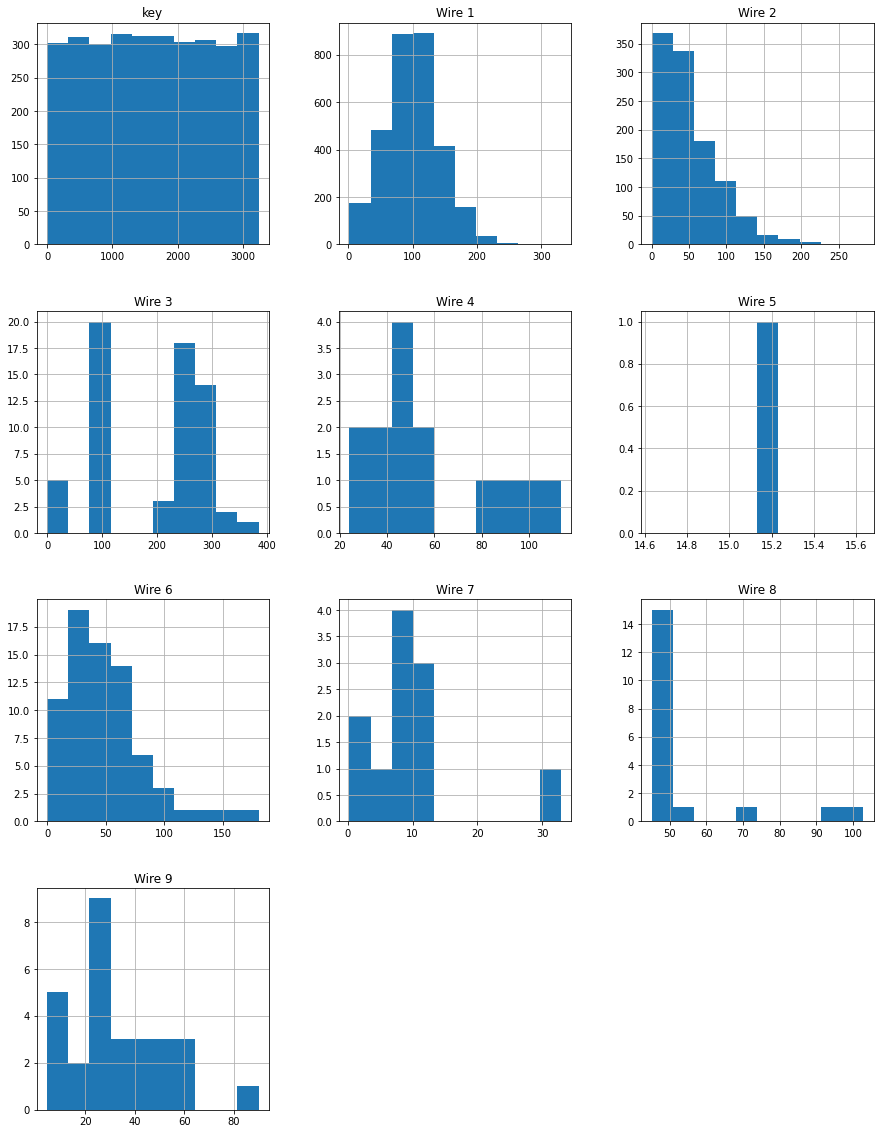

In [10]:
wire.hist(figsize=(15, 20))
plt.show()

Text(0, 0.5, 'Доля использования в партиях')

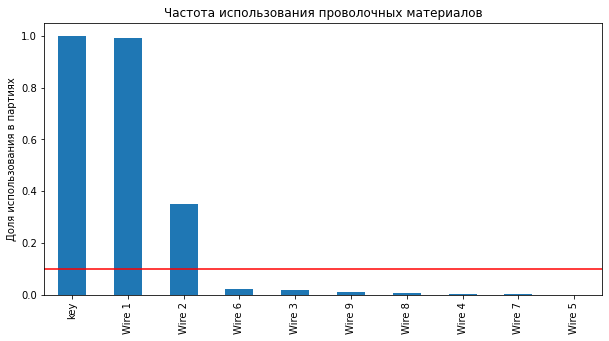

In [11]:
plt.figure(figsize = (10,5))
ax = (~wire_time.isnull()).mean().sort_values(ascending=False).plot(kind = 'bar')
ax.axhline(y=0.1, color='r', linestyle='-')
ax.set_title('Частота использования проволочных материалов')
ax.set_ylabel('Доля использования в партиях')


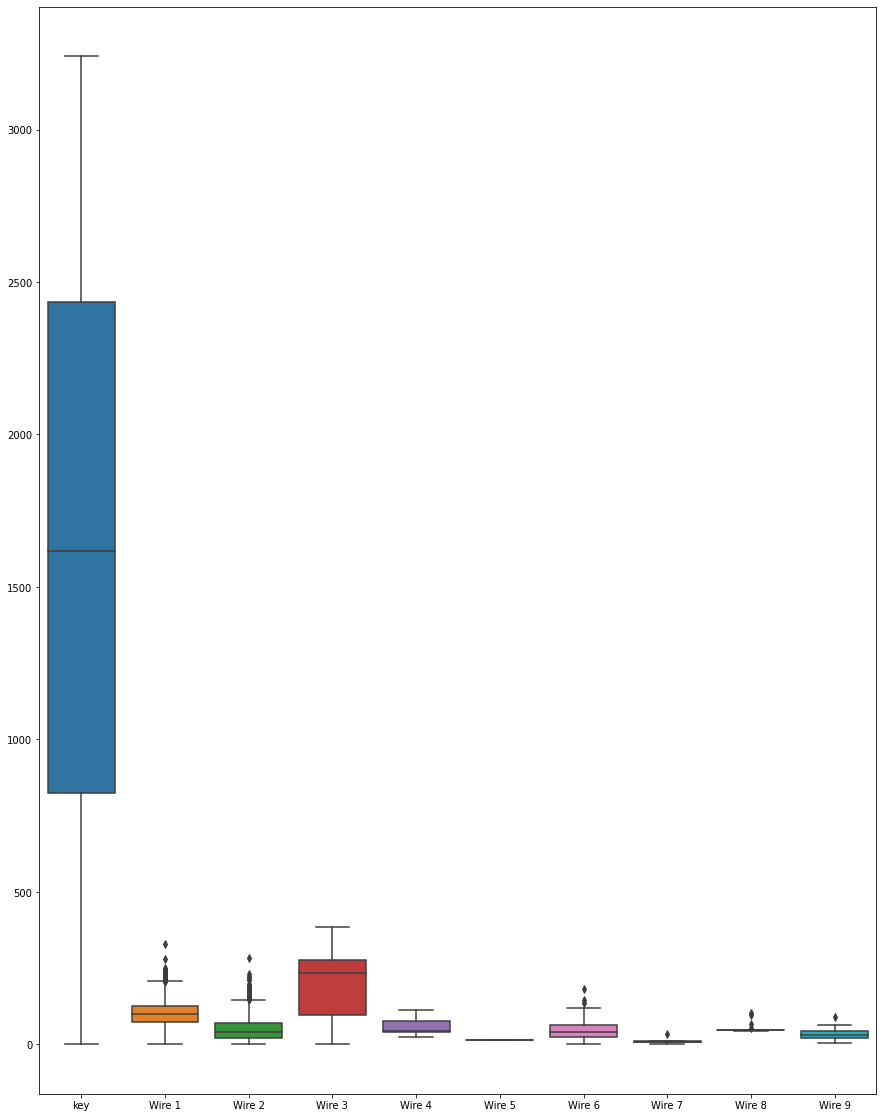

In [12]:
#построение ящиков с усами объёма проволочных материалов

plt.figure(figsize=(15,20))
ax= sns.boxplot(data=wire)

В данных о проволочных материалов(объём и время) в каждой партии добавляли одинаковое количество проволочных материалов, дубликатов нет, размер двух датасетов одинаковый(3081,10), пропуски 23385(около 75,9% от всего датасета в каждом). Наибольшее объем проволочных материалов в столбце 'Wire 3'(385), наименьший объём проволочных материалов в столбце 'Wire' 2(0.03), наибольший средний объём проволочных материалов в столбце " Wire 3"(189,5). Данные получены с 03.05.2019 с 06.09.2019. Наибольшее количество выбросов в столбцах "wire 1,2",  но необходимо учитывать количество пропусков в других столбцах. После обработки данных необходимо посмотреть количество выбросов и аномальных значений после работы с пропусками. В столбцах, где присутсвуют большее количество пропусков и следовательно, не применялись проволочные материалы.(Примечание заказчика). Остальные пропуски в предобработке необходимо заменить на 0.

1.2 Данные о объёме и времени сыпучих материалов.

In [13]:
for _ in [ bulk, bulk_time]:
    print('Первые 5 строк:')
    display(_.head(5))
    print()
    print('Последние 5 строк:')
    display(_.tail(5))
    print()
    print('Инфо по таблице:')
    display(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Количество дубликатов:', _.duplicated().sum())
    print()
    print('Распределение по партиям:')
    print(_.key.value_counts(normalize=True))
    print()
    print('Размер датасета:')
    print(_.shape)
    print()
    print('Количество пропущенных значений в таблице:')
    print(_.isnull().sum().sum ())
    print()
    print('------------------------------------------------------------------------------------------')
    print()

Первые 5 строк:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



Последние 5 строк:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0



Инфо по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None


Статистика по таблице:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000



Количество дубликатов: 0

Распределение по партиям:
2049    0.00032
2612    0.00032
2588    0.00032
541     0.00032
2590    0.00032
         ...   
1090    0.00032
3139    0.00032
1092    0.00032
3141    0.00032
2047    0.00032
Name: key, Length: 3129, dtype: float64

Размер датасета:
(3129, 16)

Количество пропущенных значений в таблице:
35776

------------------------------------------------------------------------------------------

Первые 5 строк:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47



Последние 5 строк:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaT,NaT,2019-09-06 11:54:15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-06 11:49:45,NaT,2019-09-06 11:45:22,2019-09-06 11:40:06
3125,3238,NaT,NaT,2019-09-06 12:26:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-06 12:18:35,NaT,2019-09-06 12:31:49,2019-09-06 12:26:52
3126,3239,NaT,NaT,NaT,NaT,NaT,2019-09-06 15:06:00,NaT,NaT,NaT,NaT,NaT,2019-09-06 15:01:44,NaT,2019-09-06 14:58:15,2019-09-06 14:48:06
3127,3240,NaT,NaT,NaT,NaT,NaT,2019-09-06 16:24:28,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-06 16:07:29,2019-09-06 16:01:34
3128,3241,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-06 17:26:33,2019-09-06 17:23:15



Инфо по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


None


Статистика по таблице:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
mean,1624.383509,2019-06-29 23:24:44.769841152,2019-07-12 07:57:13.045454592,2019-07-08 13:50:14.630970624,2019-07-03 11:17:28.834319616,2019-07-13 17:18:29.090908928,2019-07-06 13:50:06.345486080,2019-07-27 18:09:05.079999744,2019-07-08 17:14:53,2019-06-23 08:08:47.578947328,2019-07-06 23:55:10.954545408,2019-07-15 07:01:00.615819264,2019-07-05 22:55:11.468571392,2019-07-01 18:32:46.944444416,2019-07-06 07:17:48.372772608,2019-07-06 13:24:51.912366336
min,1.000000,2019-05-03 17:42:46,2019-05-07 15:39:35,2019-05-03 20:40:25,2019-05-03 11:28:48,2019-05-07 15:19:17,2019-05-03 19:09:15,2019-05-07 18:11:01,2019-07-08 17:14:53,2019-05-14 11:57:58,2019-05-06 07:54:02,2019-05-05 23:43:24,2019-05-03 11:24:31,2019-05-05 02:10:21,2019-05-03 11:14:50,2019-05-03 11:10:43
25%,816.000000,2019-05-29 14:48:48.500000,2019-05-28 02:29:31.500000,2019-06-08 03:50:23.500000,2019-05-30 21:36:11.249999872,2019-06-19 23:32:44,2019-06-06 22:46:10.500000,2019-07-20 23:48:47,2019-07-08 17:14:53,2019-05-14 14:31:08,2019-06-02 05:12:00.500000,2019-06-14 20:24:48,2019-06-03 12:48:47.249999872,2019-05-29 10:43:31.249999872,2019-06-04 04:50:42,2019-06-04 11:28:18
50%,1622.000000,2019-06-25 11:09:13,2019-07-27 17:18:38.500000,2019-07-04 09:31:42,2019-06-28 03:44:42.500000,2019-07-25 17:59:41,2019-07-09 03:34:57.500000,2019-07-27 18:07:02,2019-07-08 17:14:53,2019-05-14 16:55:09,2019-07-06 07:05:20,2019-07-24 11:17:22,2019-07-03 01:32:00,2019-07-01 12:59:36.500000,2019-07-03 21:54:13.500000,2019-07-03 16:43:28.500000
75%,2431.000000,2019-07-31 05:58:18.249999872,2019-08-13 02:20:08,2019-08-11 01:00:36.750000128,2019-08-04 04:15:46.500000,2019-08-13 04:23:23,2019-08-07 18:55:01.249999872,2019-08-13 04:19:43,2019-07-08 17:14:53,2019-08-16 05:43:31,2019-08-04 02:23:35.750000128,2019-08-11 05:21:01,2019-08-08 14:55:05.249999872,2019-08-04 23:32:00.249999872,2019-08-09 04:22:40.500000,2019-08-09 09:18:31.750000128
max,3241.000000,2019-09-05 09:11:32,2019-08-13 11:47:39,2019-09-06 12:26:52,2019-09-05 03:35:21,2019-09-02 18:16:52,2019-09-06 16:24:28,2019-09-05 19:07:49,2019-07-08 17:14:53,2019-08-16 09:11:56,2019-09-04 10:03:22,2019-09-06 05:03:14,2019-09-06 15:01:44,2019-09-01 01:53:02,2019-09-06 17:26:33,2019-09-06 17:23:15
std,933.337642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Количество дубликатов: 0

Распределение по партиям:
2049    0.00032
2612    0.00032
2588    0.00032
541     0.00032
2590    0.00032
         ...   
1090    0.00032
3139    0.00032
1092    0.00032
3141    0.00032
2047    0.00032
Name: key, Length: 3129, dtype: float64

Размер датасета:
(3129, 16)

Количество пропущенных значений в таблице:
35776

------------------------------------------------------------------------------------------



In [14]:
pd.DataFrame(bulk.isna().sum(), columns = ['пропуски']).style.background_gradient('coolwarm')

,пропуски
key,0
Bulk 1,2877
Bulk 2,3107
Bulk 3,1831
Bulk 4,2115
Bulk 5,3052
Bulk 6,2553
Bulk 7,3104
Bulk 8,3128
Bulk 9,3110


In [15]:
pd.DataFrame(bulk_time.isna().sum(), columns = ['пропуски']).style.background_gradient('coolwarm')

,пропуски
key,0
Bulk 1,2877
Bulk 2,3107
Bulk 3,1831
Bulk 4,2115
Bulk 5,3052
Bulk 6,2553
Bulk 7,3104
Bulk 8,3128
Bulk 9,3110


В данных об объёме и времени проволочных материалов более 3000 пропусков в столбцах Bulk 2,5,7,8,9,13

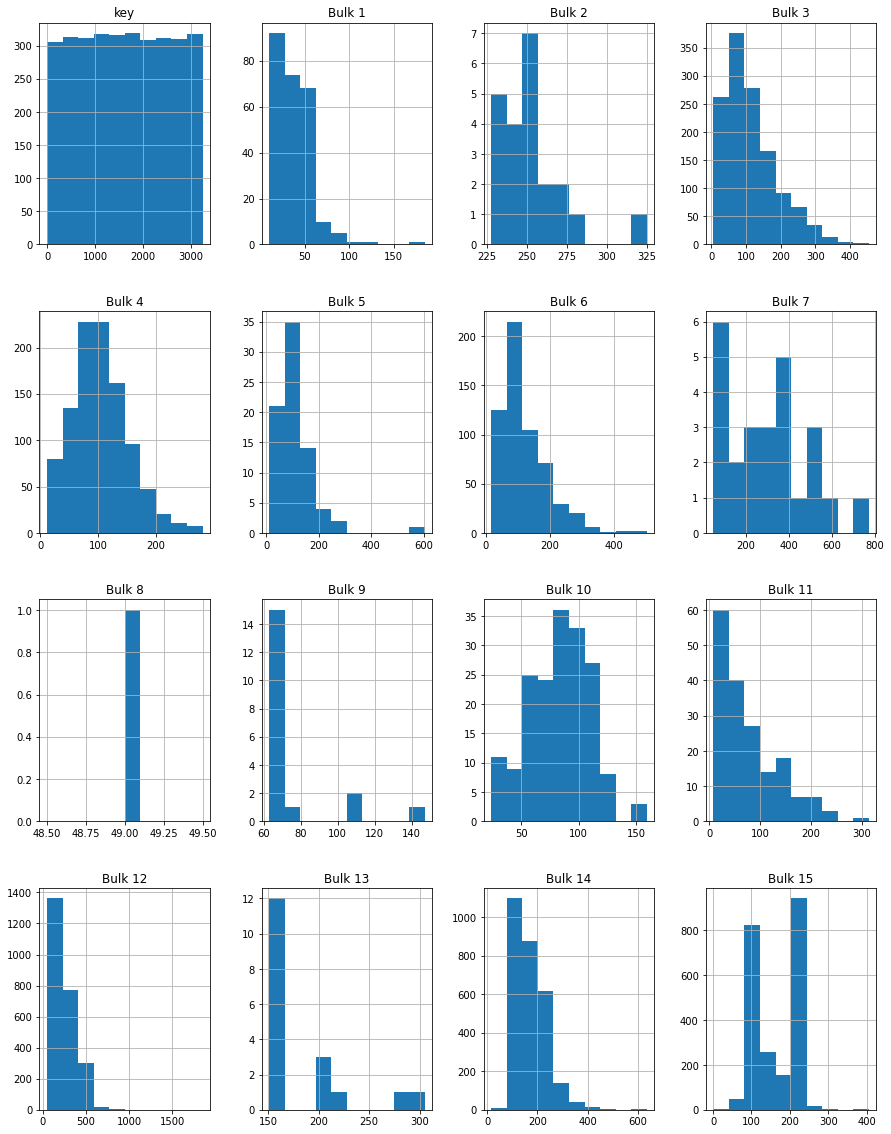

In [16]:
bulk.hist(figsize=(15, 20))
plt.show()

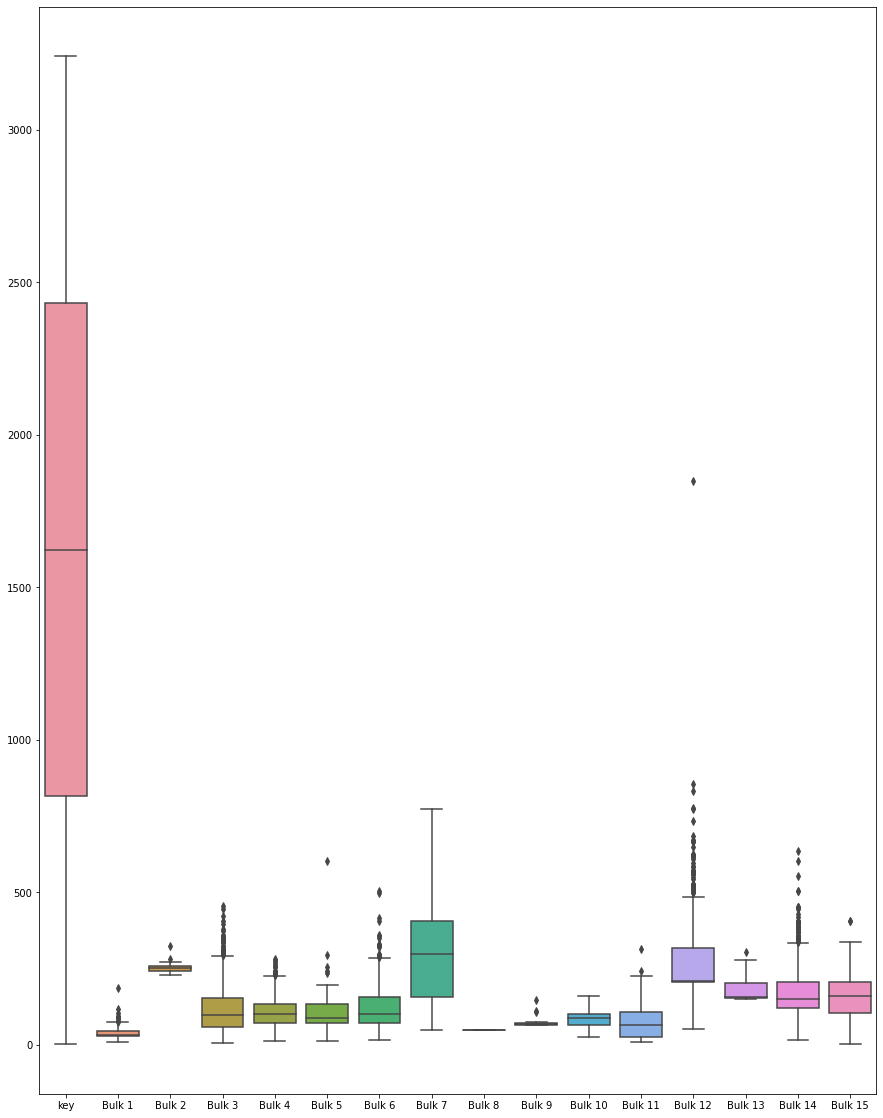

In [17]:
#построение ящиков с усами объёма проволочных материалов

plt.figure(figsize=(15,20))
ax= sns.boxplot(data=bulk)

Text(0, 0.5, 'Доля использования в партиях')

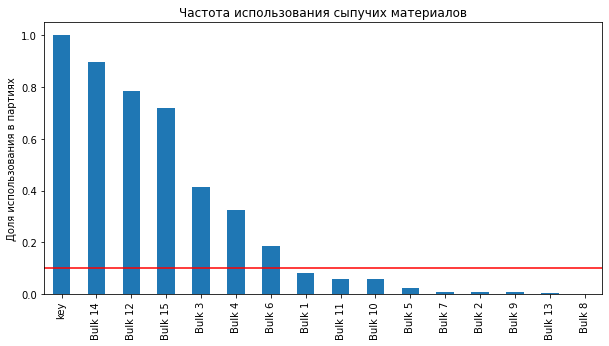

In [18]:
plt.figure(figsize = (10,5))
ax = (~bulk_time.isnull()).mean().sort_values(ascending=False).plot(kind = 'bar')
ax.axhline(y=0.1, color='r', linestyle='-')
ax.set_title('Частота использования сыпучих материалов')
ax.set_ylabel('Доля использования в партиях')

В данных о сыпучих материалов(объём и время) в каждой партии добавляли одинаковое количество сыпучих материалов, дубликатов нет, размер двух датасетов одинаковый(3129,16), пропуски 35576(около 71,1% от всего датасета в каждом). Наибольшее объем сыпучих материалов в столбце 'bulk 12'(1849), наименьший объём сыпучих материалов в столбце 'Bulk 15'(1), наибольший средний объём сыпучих материалов в столбце " Bulk 7"(305). Данные получены с 03.05.2019 с 06.09.2019. Наибольшее количество выбросов в столбцах "Bulk 3,4,5,6,1,12,14", но необходимо учитывать количество пропусков в других столбцах. После обработки данных необходимо посмотреть количество выбросов и аномальных значений после работы с пропусками. В столбцах, где присутсвуют большее количество пропусков и следовательно, не применялись сыпучие материалы.(Примечание заказчика). Остальные пропуски в предобработке необходимо заменить на 0. 
В данных об объёме и времени проволочных материалов более 3000 пропусков в столбцах Bulk 2,5,7,8,9,13. При этом частота использования сыпучих материалов в среднем наименьше всего встречаются еще с Bulk 1,11,10,2,5,7,8,9,13

1.3 Данные об электродах   

In [19]:
for _ in [arc]:
    print('Первые 5 строк:')
    display(_.head(5))
    print()
    print('Последние 5 строк:')
    display(_.tail(5))
    print()
    print('Информация по таблице:')
    display(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Количество дубликатов:', _.duplicated().sum())
    print()
    print('Распределение по партиям:')
    print(_.key.value_counts(normalize=True))
    print()
    print('Размер датасета:')
    print(_.shape)
    print()
    print('Количество пропущенных значений в таблице:')
    print(_.isnull().sum().sum ())
    print()
    print('------------------------------------------------------------------------------------------')
    print()

Первые 5 строк:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691



Последние 5 строк:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543
14875,3241,2019-09-06 17:24:54,2019-09-06 17:26:15,0.389057,0.251347



Информация по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None


Статистика по таблице:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
count,14876.000000,14876,14876,14876.000000,14876.000000
mean,1615.220422,2019-07-05 12:25:51.921081088,2019-07-05 12:28:43.592027392,0.662752,0.438986
min,1.000000,2019-05-03 11:02:14,2019-05-03 11:06:02,0.223120,-715.479924
25%,806.000000,2019-06-03 23:18:23.249999872,2019-06-03 23:21:35,0.467115,0.337175
50%,1617.000000,2019-07-03 01:31:26.500000,2019-07-03 01:35:13,0.599587,0.441639
75%,2429.000000,2019-08-07 22:52:20.750000128,2019-08-07 22:56:47,0.830070,0.608201
max,3241.000000,2019-09-06 17:24:54,2019-09-06 17:26:15,1.463773,1.270284
std,934.571502,NaN,NaN,0.258885,5.873485



Количество дубликатов: 0

Распределение по партиям:
2108    0.001076
1689    0.001008
1513    0.001008
2567    0.000941
46      0.000874
          ...   
977     0.000067
247     0.000067
2582    0.000067
248     0.000067
530     0.000067
Name: key, Length: 3214, dtype: float64

Размер датасета:
(14876, 5)

Количество пропущенных значений в таблице:
0

------------------------------------------------------------------------------------------



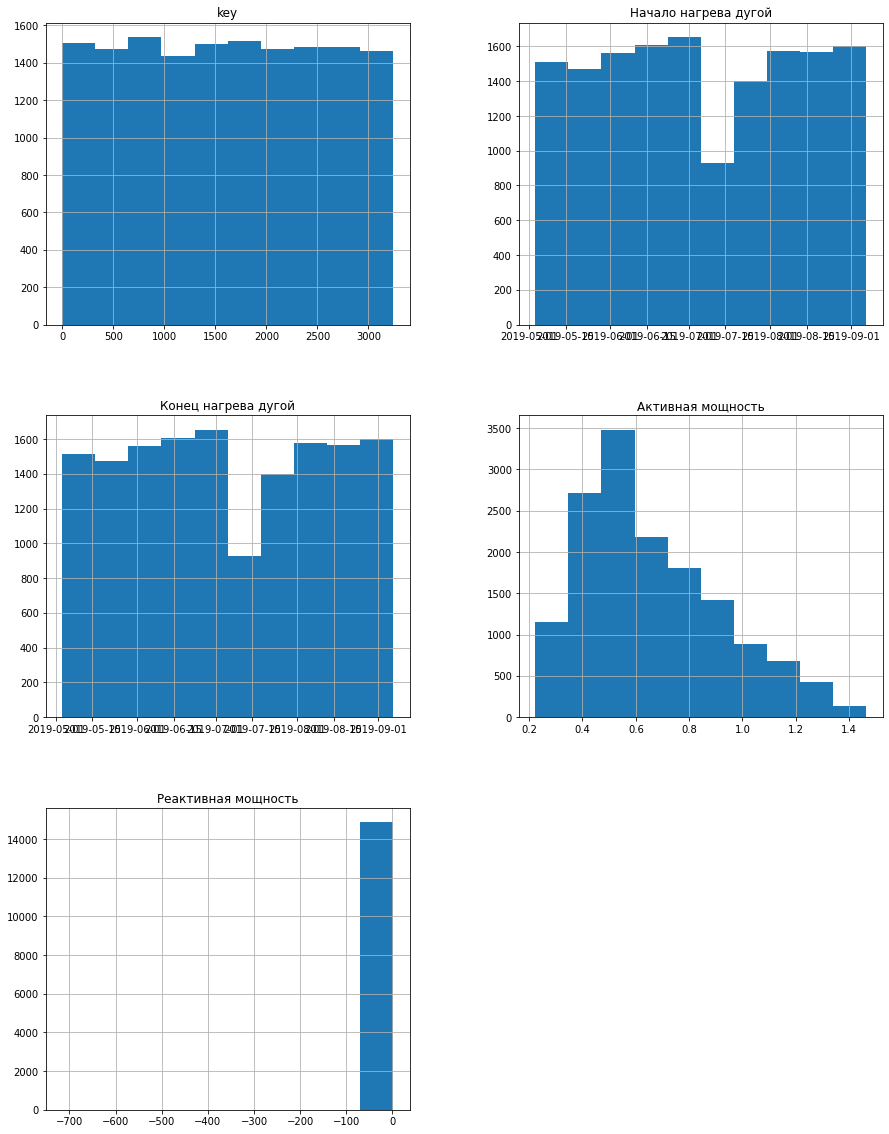

In [20]:
arc.hist(figsize=(15, 20))
plt.show()

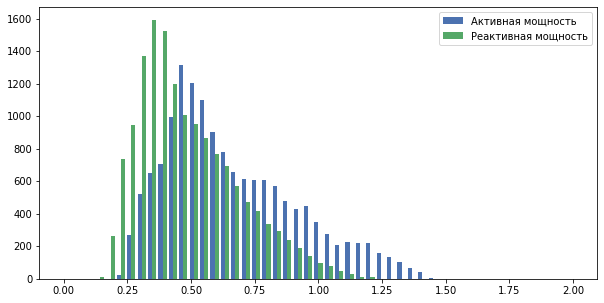

In [21]:
#составление графика соотношения активной и реативной мощности без учета отрицательных значений
plt.style.use('seaborn-deep')
plt.figure(figsize = (10,5))
x = arc['Активная мощность']
y = arc['Реактивная мощность']
bins = np.linspace(0, 2)
ax.set_title('График соотношения активной и реактивной мощностей')
plt.hist([x, y], bins, label=['Активная мощность', 'Реактивная мощность'])
plt.legend(loc='upper right')
plt.show()

In [22]:
#cоотношение активной и реативной мощности
s=arc['Активная мощность']/arc['Реактивная мощность']
s.mean()

1.373407947212952

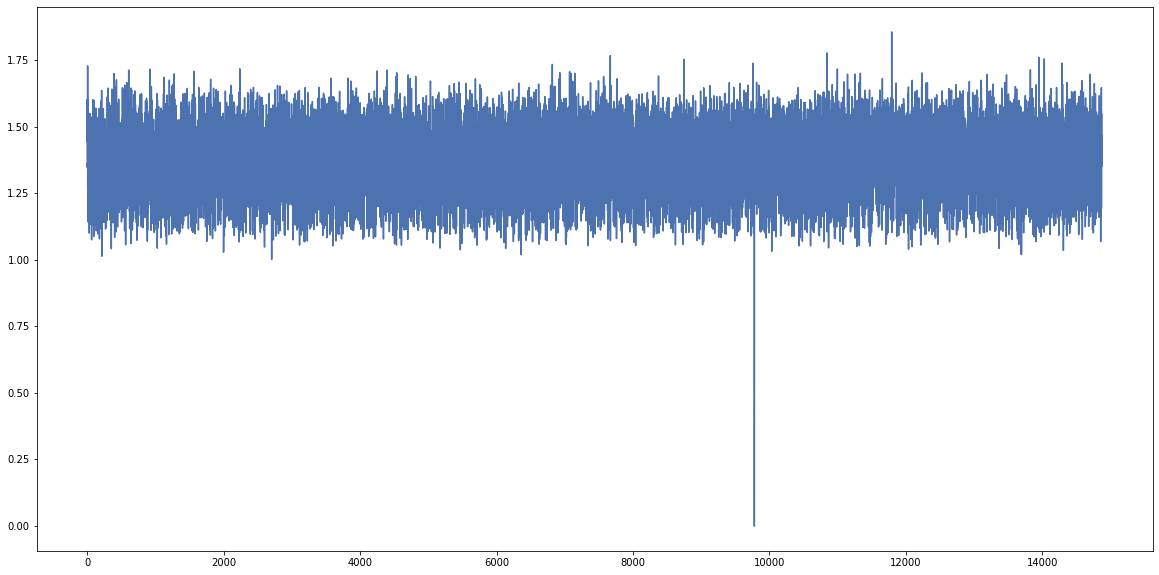

In [23]:
plt.figure(figsize=(20,10))
plt.plot(s);

Данные об электродах представлены 5 столбцами с названиями на русском языке 'Начало нагрева дуги', 'Конец нагрева дуги', 'Реактивная мощность', 'Активная мощность'. При создании единой таблицы нужно будет привести все наименования всех столбцов привести к одному языку(Английский). Дубликатов нет, пропусков нет. Размер датасета (14876, 5). Распределение по партиям различается. Необходимо агрегировать по партиям key столбцы. Имеется аномалии в реактивной мощности(отрицательные значения). Соотношение активной и реактивной мощности 1.36. Для улучшения обучения моделей в обработке данных создам новый столбец с  полной мощностью и временем нагрева дуги. Наибольшее значение 1.46 в активной мощности и 1.27 в реактивной мощности.

1.4 Данные о продувке сплава газом

In [24]:
for _ in [gas]:
    print('Первые 5 строк:')
    display(_.head(5))
    print()
    print('Последние 5 строк:')
    display(_.tail(5))
    print()
    print('Информация по таблице:')
    display(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Количество дубликатов:', _.duplicated().sum())
    print()
    print('Распределение по партиям:')
    print(_.key.value_counts(normalize=True))
    print()
    print('Размер датасета:')
    print(_.shape)
    print()
    print('Количество пропущенных значений в таблице:')
    print(_.isnull().sum().sum ())
    print()
    print('------------------------------------------------------------------------------------------')
    print()

Первые 5 строк:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Последние 5 строк:


,key,Газ 1
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959



Информация по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None


Статистика по таблице:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040



Количество дубликатов: 0

Распределение по партиям:
2049    0.000309
3135    0.000309
3115    0.000309
1070    0.000309
3119    0.000309
          ...   
2596    0.000309
549     0.000309
2600    0.000309
553     0.000309
2047    0.000309
Name: key, Length: 3239, dtype: float64

Размер датасета:
(3239, 2)

Количество пропущенных значений в таблице:
0

------------------------------------------------------------------------------------------



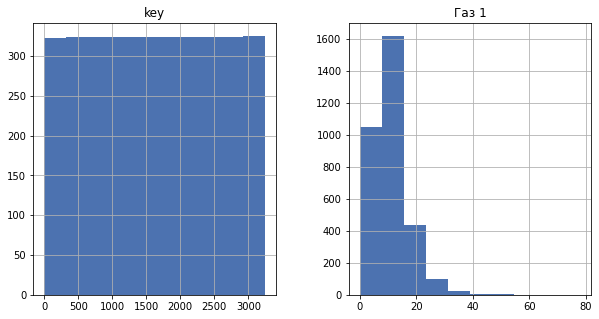

In [25]:
gas.hist(figsize=(10, 5))
plt.show()

Данные о продувке сплава газом представлены двумя столбцами с номером партии и количеством газа. Максимальное количество газа 77.9, минимальнок количество газа 0.008. Распределение количества газа по партиям одинаковое. Дубликатов и пропусков нет.

1.5 Данные об измерении температуры

In [26]:
for _ in [temp]:
    print('Первые 5 строк:')
    display(_.head(5))
    print()
    print('Последние 5 строк:')
    display(_.tail(5))
    print()
    print('Информация по таблице:')
    display(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe(datetime_is_numeric=True))
    print()
    print('Количество дубликатов:', _.duplicated().sum())
    print()
    print('Распределение по партиям:')
    print(_.key.value_counts(normalize=True))
    print()
    print('Размер датасета:')
    print(_.shape)
    print()
    print('Количество пропущенных значений в таблице:')
    print(_.isnull().sum().sum ())
    print()
    print('------------------------------------------------------------------------------------------')
    print()

Первые 5 строк:


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0



Последние 5 строк:


,key,Время замера,Температура
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN



Информация по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


None


Статистика по таблице:


,key,Время замера,Температура
count,18092.000000,18092,14665.000000
mean,1616.460977,2019-07-05 13:36:58.791620608,1590.722741
min,1.000000,2019-05-03 11:02:04,1191.000000
25%,807.750000,2019-06-04 00:35:01.249999872,1580.000000
50%,1618.000000,2019-07-03 02:11:48,1590.000000
75%,2429.000000,2019-08-07 23:10:05.249999872,1599.000000
max,3241.000000,2019-09-06 17:30:05,1705.000000
std,934.641385,NaN,20.394381



Количество дубликатов: 0

Распределение по партиям:
2108    0.000940
1513    0.000884
1689    0.000884
2567    0.000829
322     0.000774
          ...   
556     0.000111
1169    0.000111
732     0.000111
195     0.000055
279     0.000055
Name: key, Length: 3216, dtype: float64

Размер датасета:
(18092, 3)

Количество пропущенных значений в таблице:
3427

------------------------------------------------------------------------------------------



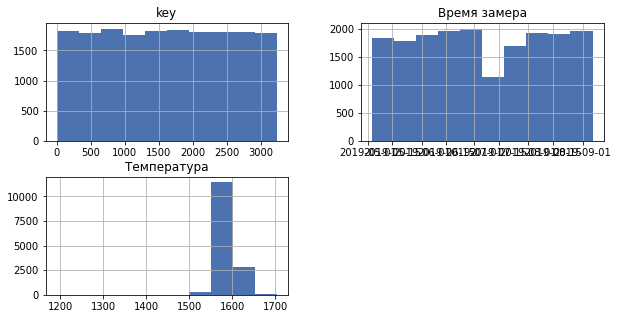

In [27]:
temp.hist(figsize=(10, 5))
plt.show()

Данные об измерении температуры представлены временем замера, и температурой. Названия столбцов на русском языке. Дубликатов нет, размер датасета (18092,3), количество пропусков 3427. Распределение количества измерений температуры по партиям различно.Необходимо удалить аномалии с температурой ниже 1500 градусов

Вывод

In [28]:
# представлю первоначальные данные о датасетах в виде таблицы 
index = ['данные о проволочных материалах (объём)',
         'данные о проволочных материалах (время)',
         'данные о подаче сыпучих материалов (объём)',
         'данные о подаче сыпучих материалов (время)',
         'данные об электродах',
         'данные о продувке сплава газом',
         'результаты измерения температуры']
TAB = {'Размер датасета':               [(3081,10),
                                         (3081,10),
                                         (3129,16),
                                         (3129,16),
                                         (14876,5),
                                         (3239,2),
                                         (18092,3)],
       
         'Пропуски':                     [23385,
                                          23385,
                                          35576,
                                          35576,
                                              0,
                                              0,
                                           3427],
       
         'Дубликаты':                       [ 0,
                                              0,
                                              0,
                                              0,
                                              0,
                                              0,
                                              0]
         
         }
TAB = pd.DataFrame(data=TAB, index=index)  

In [29]:
TAB
TAB.style\
    .background_gradient(cmap='coolwarm')

,Размер датасета,Пропуски,Дубликаты
данные о проволочных материалах (объём),"(3081, 10)",23385,0
данные о проволочных материалах (время),"(3081, 10)",23385,0
данные о подаче сыпучих материалов (объём),"(3129, 16)",35576,0
данные о подаче сыпучих материалов (время),"(3129, 16)",35576,0
данные об электродах,"(14876, 5)",0,0
данные о продувке сплава газом,"(3239, 2)",0,0
результаты измерения температуры,"(18092, 3)",3427,0


 Данные металлургического комбината "Так закаляем сталь" представлены в виде датасетов из 7 таблиц с данными об объеме и времени проволочных материалов, данные об объёме и времени подачи сыпучих материалов, об электродах, о продувке сплава газом, об результатах измерения температуры. В ходе исследовательского анализа данных была изучена первоначальная информация о датасетах(информации о столбцах, рамзерах датасета, количестве пропусков и дубликатов, небольшом исследовательском анализе данных с построением графиков до обработки данных)
 В результате исследовательского анализа данных наиибольшее количество пропусков в данных об объёме и времени подачи сыпучих и проволочных материалов. В данных об электродах и о продувке сплава газом пропуски отсутсвуют. Дубликаты в датасетах отсутствуют. Пропуски необходимо будет обработать в предобработке данных. Также в данных имеются аномалии, которые необходимо в предобработке данных удалить после разделения на выборки. 

# 2. Предобработка данных

# 2.1. Предобработка данных о проволочных и сыпучих материалах


In [30]:
# замена пропусков на 0 в столбцах об объёме и времени проволочных материалов
wire = wire.fillna(0)
wire_time = wire_time.fillna(0)

In [31]:
#создание столбца о сумме проволочных материалов
cols = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8','Wire 9']
wire['Wire sum'] = wire[cols].sum(axis= 1)

In [32]:
#удаление столбцов, которые не используются в партии(пропусков более 3000)
wire = wire.drop(['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8','Wire 9'], axis= 1)
wire_time = wire_time.drop(['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8','Wire 9'], axis= 1)

In [33]:
wire.head(5)

,key,Wire 1,Wire 2,Wire sum
0,1,60.059998,0.00000,60.059998
1,2,96.052315,0.00000,96.052315
2,3,91.160157,0.00000,91.160157
3,4,89.063515,0.00000,89.063515
4,5,89.238236,9.11456,98.352796


In [34]:
wire_time.head(5)

,key,Wire 1,Wire 2
0,1,2019-05-03 11:06:19,0
1,2,2019-05-03 11:36:50,0
2,3,2019-05-03 12:11:46,0
3,4,2019-05-03 12:43:22,0
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34


In [35]:
print(wire.isnull().sum().sum ())

0


In [36]:
print(wire_time.isnull().sum().sum ())

0


In [37]:
# замена пропусков на 0 в столбцах об объёме и времени сыпучих материалов
bulk = bulk.fillna(0)
bulk_time = bulk_time.fillna(0)

In [38]:
#создание столбца о сумме сыпучих материалов
cols_b = ['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']
bulk['Bulk sum'] = bulk[cols_b].sum(axis= 1)


In [39]:
#удаление столбцов, которые не используются в партии(пропусков более 3000)
bulk = bulk.drop(['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7',  'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11'], axis= 1)
bulk_time = bulk_time.drop(['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11'], axis= 1)

In [40]:
bulk.head(5)

,key,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Bulk sum
0,1,0.0,43.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,73.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,34.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,81.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,78.0,0.0,203.0,0.0,151.0,152.0,584.0


In [41]:
bulk_time.head(5)

,key,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0,2019-05-03 11:28:48,0,2019-05-03 11:24:31,0,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,0,2019-05-03 11:36:50,0,2019-05-03 11:53:30,0,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,0,2019-05-03 12:32:39,0,2019-05-03 12:27:13,0,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,0,2019-05-03 12:43:22,0,2019-05-03 12:58:00,0,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,0,2019-05-03 13:30:47,0,2019-05-03 13:30:47,0,2019-05-03 13:34:12,2019-05-03 13:30:47


In [42]:
print(bulk.isnull().sum().sum ())

0


In [43]:
print(bulk_time.isnull().sum().sum ())

0


In [44]:
bulk.shape

(3129, 9)

В предобработке данных с проволочными и сыпучим материалами было проведены следующие действия:
  
  замена пропусков на 0;
 
  создание столбцов о сумме использованных материалов в технологическом процессе по закаливанию стали;
  
  удаление столбцов с объёмом сыпучих и проволочных материалов, которые не используются в партии(пропуски более 3000);
  
  проверка датасета .

# 2.2. Предобработка данных об электродах и газе

In [45]:
#удаление из датасета с отрицательными значениями реактивной мощности
arc = arc[arc['Реактивная мощность'] > 0]

In [46]:
#замена названий столбцов на названия столбцов на английском языке
arc.rename(columns = {'Активная мощность':'active power', 'Реактивная мощность':'reactive power', 'Начало нагрева дугой':'start of arc heating', 'Конец нагрева дугой':'end of arc heating'}, inplace = True )

In [47]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14875 non-null  int64         
 1   start of arc heating  14875 non-null  datetime64[ns]
 2   end of arc heating    14875 non-null  datetime64[ns]
 3   active power          14875 non-null  float64       
 4   reactive power        14875 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.3 KB


In [48]:
# создание столбца со значением времени нагрева в минутах
arc["heating time"] = (arc['end of arc heating'] - arc['start of arc heating']).dt.seconds.div(60).astype(int)

In [49]:
# Агрегирование датасета с группировкой 'key' по сумме
arc = arc.groupby('key').agg(heating_time = ('heating time', 'sum'), active_power = ('active power', 'sum'), reactive_power = ('reactive power', 'sum'))


In [50]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   heating_time    3214 non-null   int64  
 1   active_power    3214 non-null   float64
 2   reactive_power  3214 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 100.4 KB


Для создания нового столбца со значением полной мощности была использована формула
Полная мощность электроприбора  $S$ — это суммарная величина, которая включает в себе как активную, так и реактивную составляющие мощности. 
Формула расчета полной мощности: 
$$S  = I × U$$ или $$S = √( P2 + Q2)$$, где

$P$ - активная мощность

$Q$ - реактивная мощность



In [51]:
# создание столбца с полной мощностью, рассчитанной по формуле
arc['full_power'] = np.sqrt(arc['active_power']**2 + arc['reactive_power']**2)

In [52]:
arc.head(5)

,heating_time,active_power,reactive_power,full_power
key,,,,
1,16,3.036730,2.142821,3.716640
2,12,2.139408,1.453357,2.586371
3,9,4.063641,2.937457,5.014163
4,10,2.706489,2.056992,3.399456
5,13,2.252950,1.687991,2.815155


Так как в данных о газе нет дубликатов и пропусков, одинаковое распределение по партиям. Поэтому здесь необходима замена столбца с русского на английский язык

In [53]:
gas.rename(columns = {'Газ 1': 'Gas'}, inplace = True )

In [54]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


 В данных об электродах нет дубликатов и пропусков данных, поэтому в предобработке данных с электродами были проведены следующие действия:
  
  удалены из датасета все значения с отрицательной мощностью;
 
  создание столбца с временем нагрева, который рассчитывался разностью временем конца и начала нагрева дуги;

  изменение названия столбцов на английский язык, чтобы в окончательном(единой) датасете данные были приведены к единому виду;
  
  вследствие неодинакового распределения по партиям данных об электродам было проведено агрегирование по партиям с суммой активной и реактивной мощностей, временем нагрева в минутах;
  
  создание столбца с полной мощностью, которая рассчитывается по формуле, как квадратный корень из суммы квадратов активной и реактивной мощностей;
   
  проверка датасета .

# 2.3 Предобработка данных о температуре

In [55]:

#удаление строк из датасета с партиями, где нет данных по финальной температуре 
temp_pass = temp[temp['Температура'].isna()]['key'].unique()
temp = temp[~temp['key'].isin(temp_pass)]
temp.head(10)



,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [56]:

#удаление аномальных значений, где температура ниже 1500 градусов
temp_anomaly = temp[temp['Температура'] <= 1500]['key'].unique()
temp = temp[~temp['key'].isin(temp_anomaly)]
temp = temp.reset_index(drop=True)
temp.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [57]:
#создание переменной  target с агрегированием по финальной и первоначальной тампературе,  временем замера с группировкой по партиям
target =  temp.groupby(by = 'key', as_index = False).agg(['first', 'last'])

In [58]:
target.head(5)

Время замера                     Температура        
                  first                last       first    last
key                                                            
1   2019-05-03 11:02:04 2019-05-03 11:30:38      1571.0  1613.0
2   2019-05-03 11:34:04 2019-05-03 11:55:09      1581.0  1602.0
3   2019-05-03 12:06:44 2019-05-03 12:35:57      1596.0  1599.0
4   2019-05-03 12:39:27 2019-05-03 12:59:47      1601.0  1625.0
5   2019-05-03 13:11:03 2019-05-03 13:36:39      1576.0  1602.0

In [59]:
# создание названий столбцов на английском языке
target.columns = ['time_first', 'time_last', 'temp_first', 'temp_last']

In [60]:
target.head(5)

,time_first,time_last,temp_first,temp_last
key,,,,
1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0


In [61]:
#создание столбца с временем измерения температуры в минутах
target['time_temp'] = (target['time_first'] - target['time_last']).dt.seconds.div(60).astype(int)

In [62]:
target = target.drop(['time_first', 'time_last'],axis=1)

In [63]:
target.head(5)

,temp_first,temp_last,time_temp
key,,,
1,1571.0,1613.0,1411
2,1581.0,1602.0,1418
3,1596.0,1599.0,1410
4,1601.0,1625.0,1419
5,1576.0,1602.0,1414


In [64]:
target.isnull().sum().sum ()

0

В предобработке данных с температурой были проведены следующие действия:

удаление из датасета все значения с температурой ниже 1500 градусов;

удаление строк из датасета, где нет измерения финальной температуры;

создание переменной target с агрегированием по финальной и первоначальной тампературе,  временем замера с группировкой по партиям;

создание столбца с временем измерения температуры;
проверка датасета .

# 2.4 Объединение таблиц и исследовательский анализ данных

In [65]:
#объединение датасетов bulk, wire, arc, temp, gas 
data = target.merge(right=arc,
                       how='inner',
                       on='key')\
                .merge(right=bulk,
                       how='inner',
                       on='key')\
                .merge(right=gas,
                       how='inner',
                       on='key')\
                .merge(right=wire,
                       how='inner',
                       on='key')

data

,key,temp_first,temp_last,time_temp,heating_time,active_power,reactive_power,full_power,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Bulk sum,Gas,Wire 1,Wire 2,Wire sum
0,1,1571.0,1613.0,1411,16,3.036730,2.142821,3.716640,0.0,43.0,0.0,206.0,0.0,150.0,154.0,553.0,29.749986,60.059998,0.00000,60.059998
1,2,1581.0,1602.0,1418,12,2.139408,1.453357,2.586371,0.0,73.0,0.0,206.0,0.0,149.0,154.0,582.0,12.555561,96.052315,0.00000,96.052315
2,3,1596.0,1599.0,1410,9,4.063641,2.937457,5.014163,0.0,34.0,0.0,205.0,0.0,152.0,153.0,544.0,28.554793,91.160157,0.00000,91.160157
3,4,1601.0,1625.0,1419,10,2.706489,2.056992,3.399456,0.0,81.0,0.0,207.0,0.0,153.0,154.0,595.0,18.841219,89.063515,0.00000,89.063515
4,5,1576.0,1602.0,1414,13,2.252950,1.687991,2.815155,0.0,78.0,0.0,203.0,0.0,151.0,152.0,584.0,5.413692,89.238236,9.11456,98.352796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2495,1570.0,1591.0,1417,10,3.168133,2.210936,3.863328,21.0,0.0,0.0,256.0,0.0,129.0,223.0,719.0,7.125735,89.150879,0.00000,89.150879
2321,2496,1554.0,1591.0,1411,12,4.174918,2.872031,5.067396,0.0,63.0,0.0,256.0,0.0,129.0,226.0,796.0,9.412616,114.179527,0.00000,114.179527
2322,2497,1571.0,1589.0,1423,8,3.605239,2.452092,4.360104,0.0,85.0,0.0,230.0,0.0,124.0,226.0,665.0,6.271699,94.086723,9.04800,103.134723
2323,2498,1591.0,1594.0,1414,11,3.202310,2.239820,3.907887,90.0,0.0,0.0,206.0,0.0,129.0,207.0,733.0,14.953657,118.110717,0.00000,118.110717


In [66]:
data = data.drop(['key'], axis=1)


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_first      2325 non-null   float64
 1   temp_last       2325 non-null   float64
 2   time_temp       2325 non-null   int64  
 3   heating_time    2325 non-null   int64  
 4   active_power    2325 non-null   float64
 5   reactive_power  2325 non-null   float64
 6   full_power      2325 non-null   float64
 7   Bulk 3          2325 non-null   float64
 8   Bulk 4          2325 non-null   float64
 9   Bulk 6          2325 non-null   float64
 10  Bulk 12         2325 non-null   float64
 11  Bulk 13         2325 non-null   float64
 12  Bulk 14         2325 non-null   float64
 13  Bulk 15         2325 non-null   float64
 14  Bulk sum        2325 non-null   float64
 15  Gas             2325 non-null   float64
 16  Wire 1          2325 non-null   float64
 17  Wire 2          2325 non-null   f

In [68]:
data.isnull().sum().sum ()

0

In [69]:
data.shape

(2325, 19)

Text(0.5, 1.0, 'Тепловая карта матрицы корреляций')

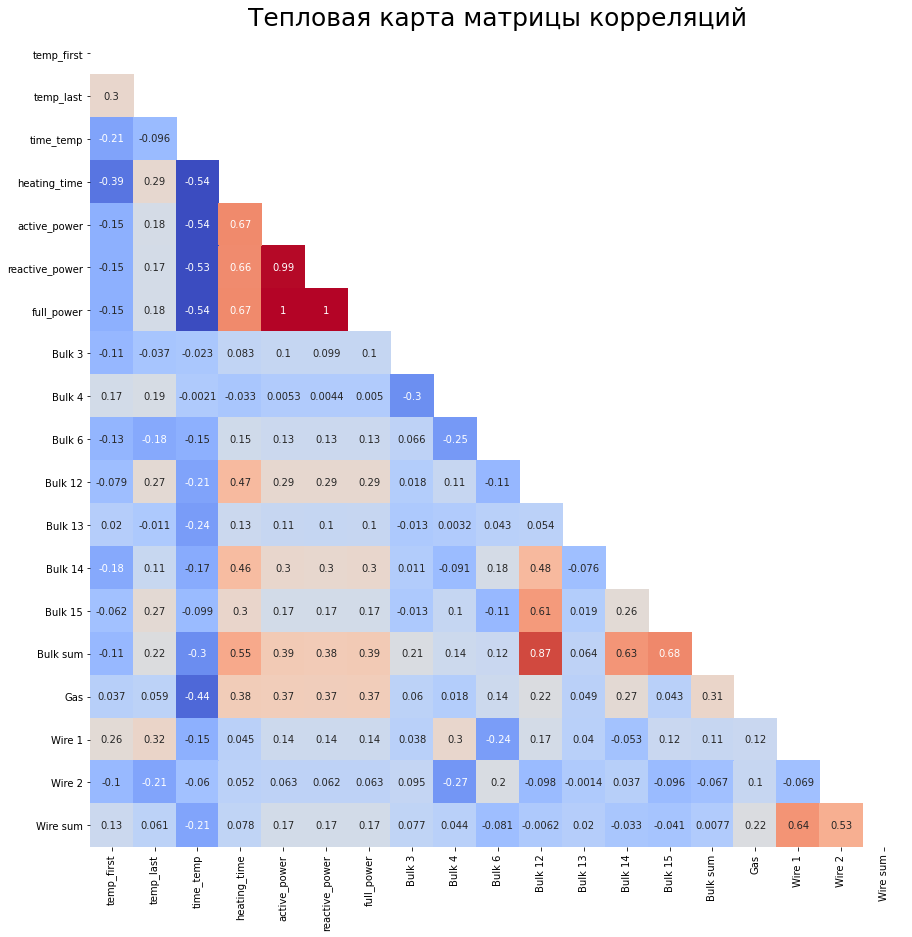

In [70]:
#строю тепловую карту корреляций
plt.figure(figsize=(15, 15))
matrix = np.triu(data.corr())
heatmap = sns.heatmap(data.corr(),
                      annot=True,
                      mask=matrix,
                      square=True,
                      cmap='coolwarm',
                      cbar=False,
                      fmt='.2g')
heatmap.set_title('Тепловая карта матрицы корреляций', fontsize=25)

С полной мощностью сильно коррелируют активная и реактивная мощность(1 и 1 соответственно). Имеется мультиколлинеарность. С признаком времени нагрева корреляция составляет 0.67, обратная зависимость с временем измерения температуры обратная зависимость(-0.54). С суммой объема сыпучих материалов сильно коррелирует Bulk 12(0.87), также с Bulk 14(0.63) Bulk 15(0.68). JС суммой объема сыпучих материалов коррелируют  Wire 1, Wire 2. C объемом газа имеется обратная зависимость(-0.44), также зависимость с мощностью(полной, реактивной, активной) 0.37.                                                                                  

               

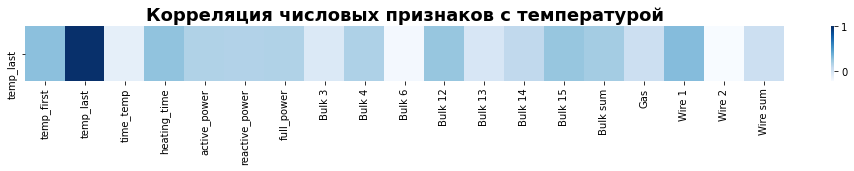

In [71]:

num=data.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['temp_last'], ascending=False).head(1), cmap='Blues')
plt.title("Корреляция числовых признаков с температурой", weight='bold', fontsize=18)
plt.show()



Целевой признак (Финальная температура) коррелирует  с первой измеренной температурой, с временем нагрева 0.29, с объемом проволочного материала Wire 1(0.32), с объёмом сыпучих материалов Bulk 12(0.27), Bulk 15(0.27).наименьшая корреляция с объёмом сыпучих материалов Bulk 13.

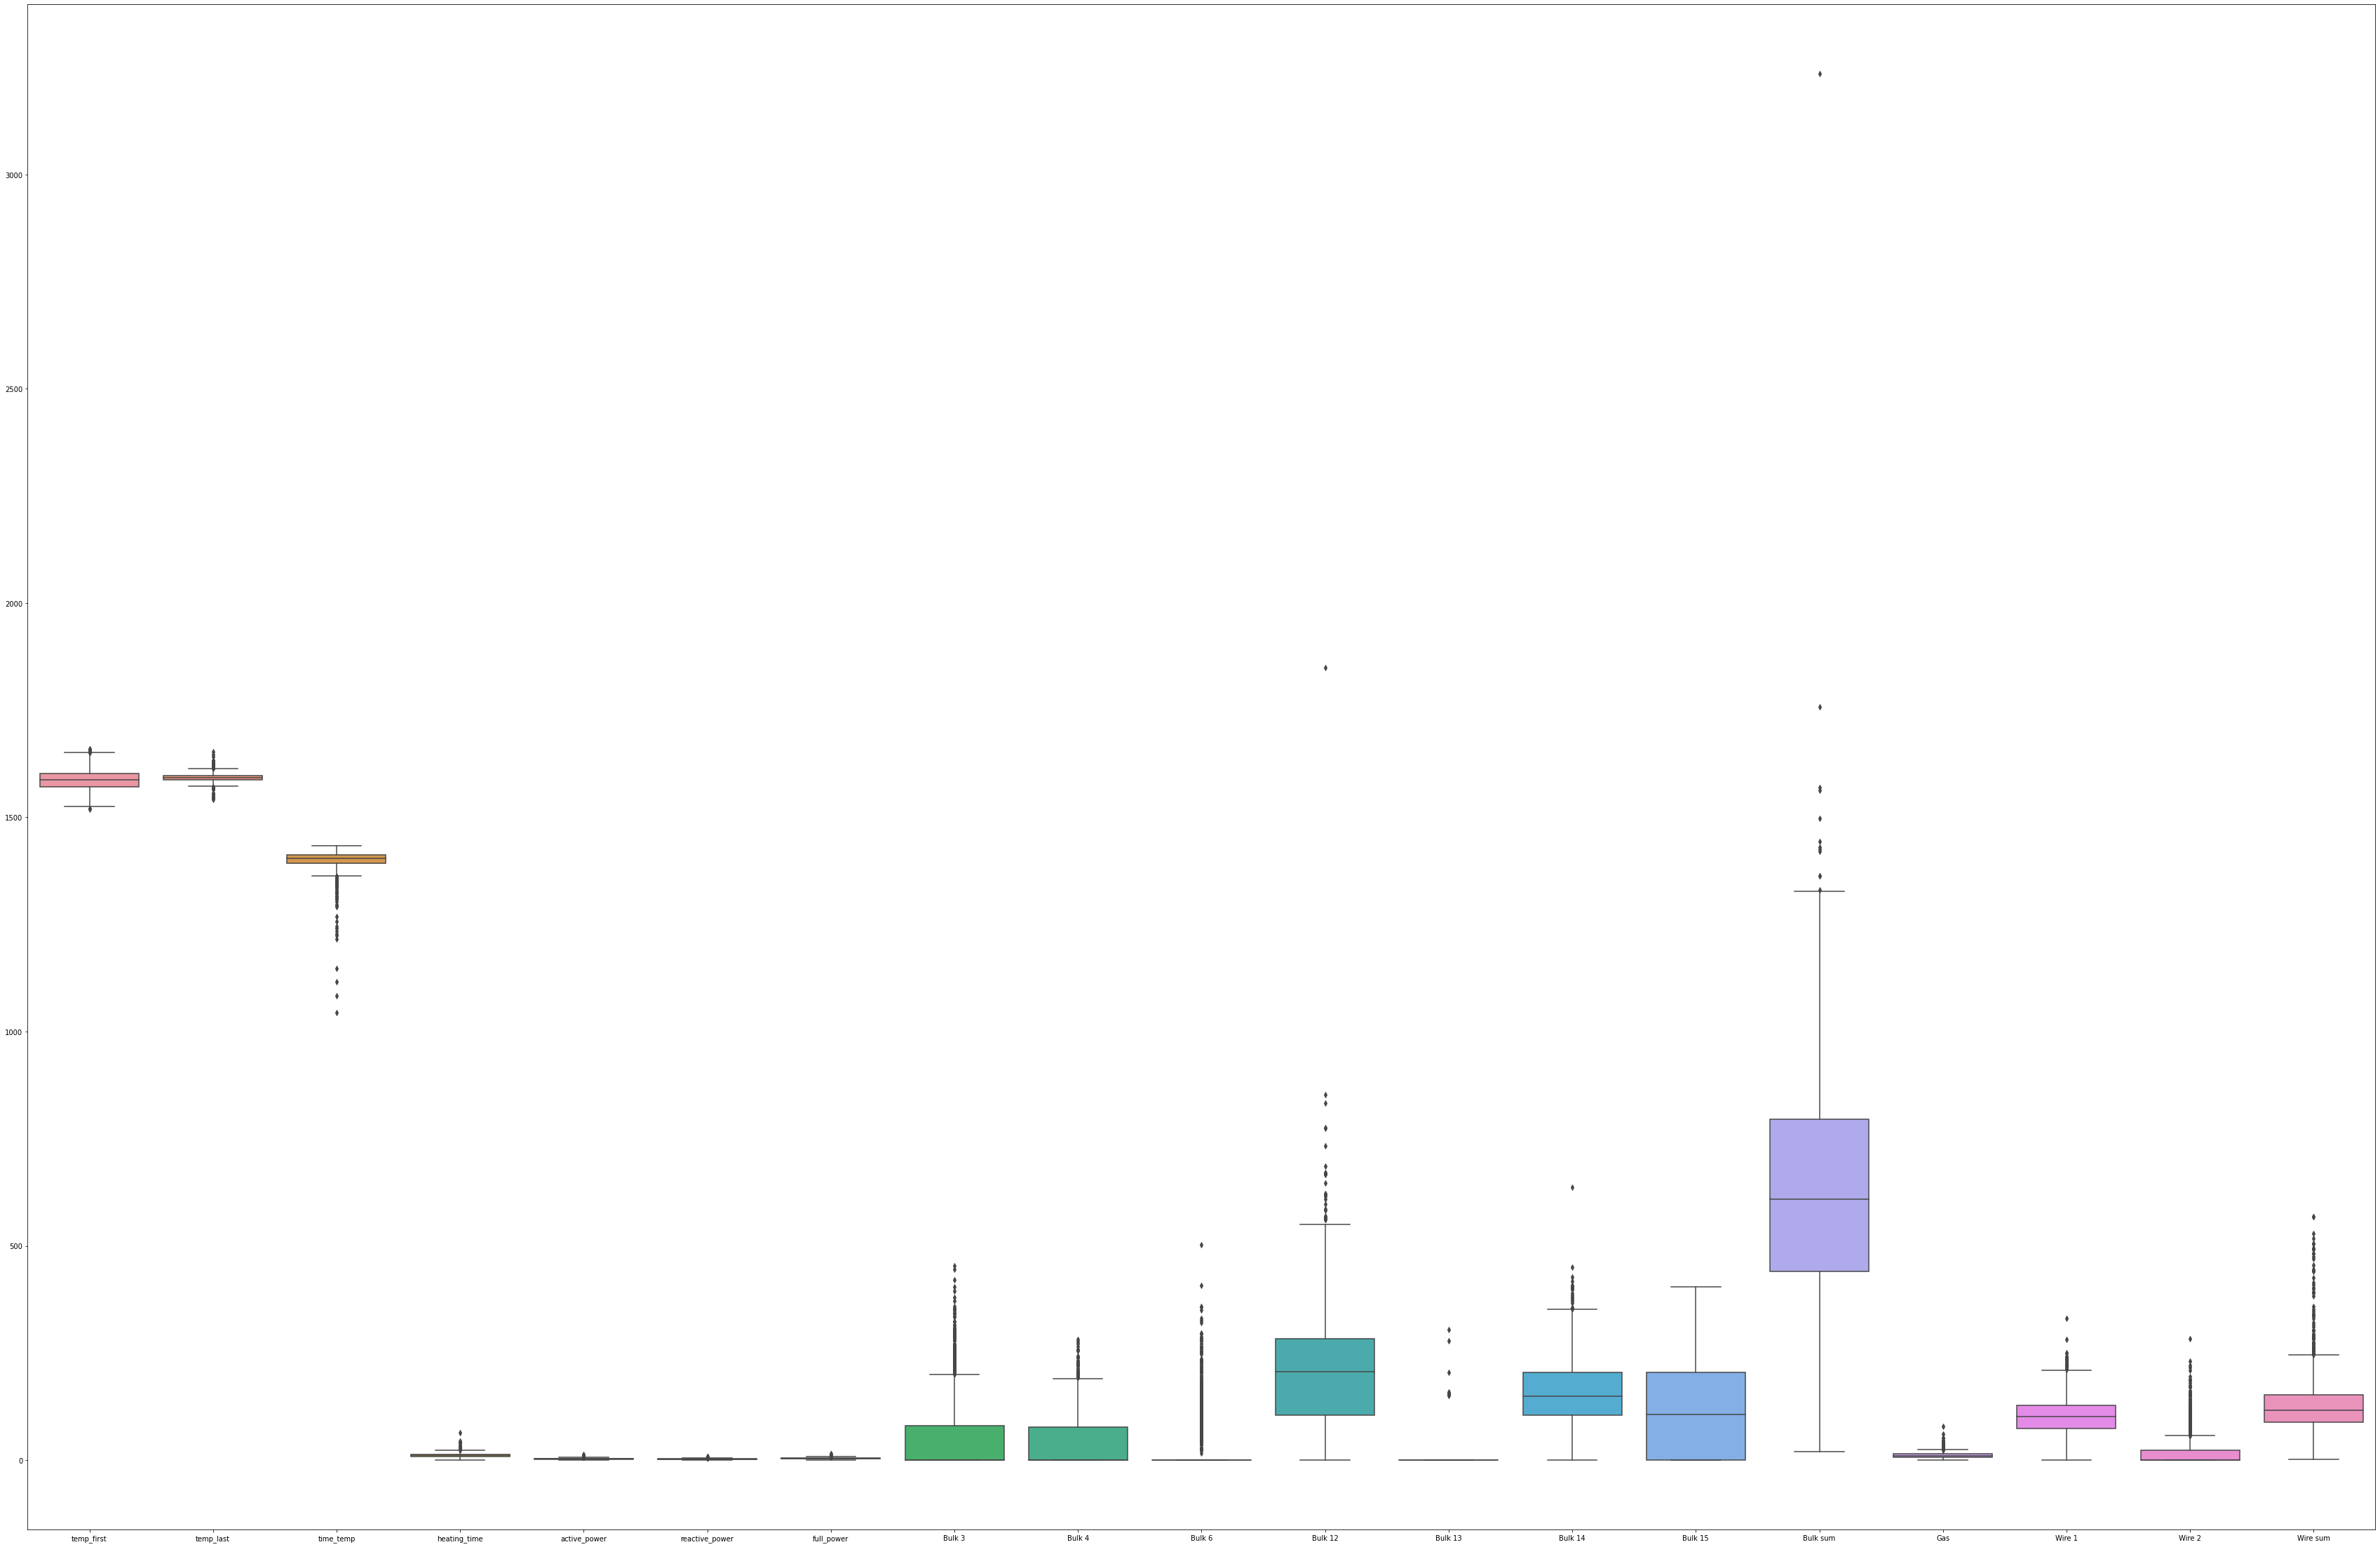

In [72]:
plt.figure(figsize=(60,40))
ax= sns.boxplot(data=data)

In [73]:
data_lin = data.copy()
data_lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_first      2325 non-null   float64
 1   temp_last       2325 non-null   float64
 2   time_temp       2325 non-null   int64  
 3   heating_time    2325 non-null   int64  
 4   active_power    2325 non-null   float64
 5   reactive_power  2325 non-null   float64
 6   full_power      2325 non-null   float64
 7   Bulk 3          2325 non-null   float64
 8   Bulk 4          2325 non-null   float64
 9   Bulk 6          2325 non-null   float64
 10  Bulk 12         2325 non-null   float64
 11  Bulk 13         2325 non-null   float64
 12  Bulk 14         2325 non-null   float64
 13  Bulk 15         2325 non-null   float64
 14  Bulk sum        2325 non-null   float64
 15  Gas             2325 non-null   float64
 16  Wire 1          2325 non-null   float64
 17  Wire 2          2325 non-null   f

In [74]:
#удаление сильно коррелирующих признаков
data_lin = data_lin.drop(['Bulk 12','reactive_power','active_power'],axis=1)

Text(0.5, 1.0, 'Матрица корреляций')

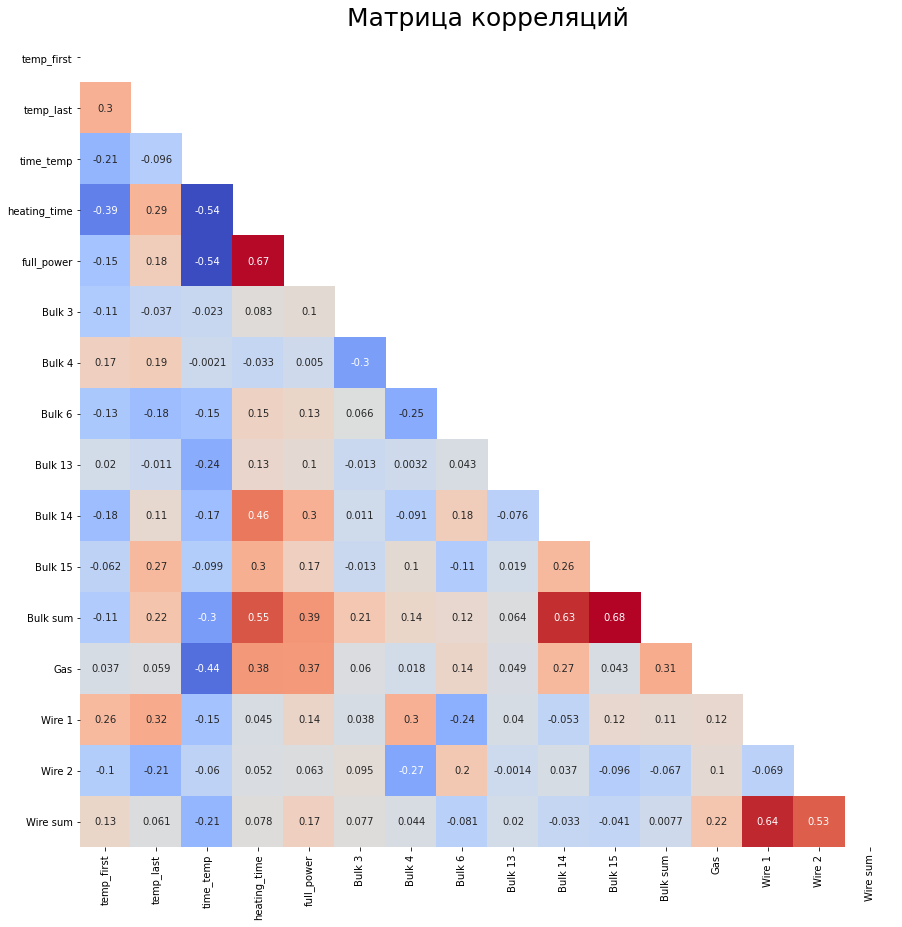

In [75]:
#Построение матрицы корреляций
plt.figure(figsize=(15, 15))
matrix = np.triu(data_lin.corr())
heatmap = sns.heatmap(data_lin.corr(),
                      annot=True,
                      mask=matrix,
                      square=True,
                      cmap='coolwarm',
                      cbar=False,
                      fmt='.2g')
heatmap.set_title('Матрица корреляций', fontsize=25)

В результате я объединила все датасеты в одну таблицу функцией merge c помощью INNER.Получилась единая таблица с 19 столбцов, 2325 строк. При создании матрицы орреляций с помощью тепловой карты можно увидеть сильную корреляцию ряда признаков более 0.9.  Целевым признаком является последняя измеренная температура. Она коррелирует с первой измеренной температурой, с временем нагрева 0.29, с объемом проволочного материала Wire 1(0.32), с объёмом сыпучих материалов Bulk 12(0.27), Bulk 15(0.27).наименьшая корреляция с объёмом сыпучих материалов Bulk 13. Я копировала датасет для удаления признаков мультиколлинеарности  для обучения линейных моделей. В результате были удалены столбцы 'Bulk 12','reactive_power','active_power'.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проверяешь попарные корреляции признаков

# 3. Построение моделей машинного обучения

# 3.1 Разделение на выборки

Выборка разделена на обучающую и тестовую 75% и 25% выборки соответственно.

In [76]:
#разделение на выборки

train, test = train_test_split(data, test_size=0.25, shuffle=True, random_state=random_state)

#разделение на выборки для линейных моделей

train_lin, test_lin = train_test_split(data_lin, test_size=0.25, shuffle=True, random_state=random_state)

In [77]:
train.shape


(1743, 19)

In [78]:
test.shape

(582, 19)

In [79]:
train_lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 1219 to 2198
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_first    1743 non-null   float64
 1   temp_last     1743 non-null   float64
 2   time_temp     1743 non-null   int64  
 3   heating_time  1743 non-null   int64  
 4   full_power    1743 non-null   float64
 5   Bulk 3        1743 non-null   float64
 6   Bulk 4        1743 non-null   float64
 7   Bulk 6        1743 non-null   float64
 8   Bulk 13       1743 non-null   float64
 9   Bulk 14       1743 non-null   float64
 10  Bulk 15       1743 non-null   float64
 11  Bulk sum      1743 non-null   float64
 12  Gas           1743 non-null   float64
 13  Wire 1        1743 non-null   float64
 14  Wire 2        1743 non-null   float64
 15  Wire sum      1743 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 231.5 KB


In [80]:
#разделение по целевому признаку 

features_train = train.drop(['temp_last'], axis = 1)
target_train = train['temp_last']

features_test = test.drop(['temp_last'], axis = 1)
target_test = test['temp_last']

#разделение по целевому признаку  для линейных моделей

features_train_lin = train_lin.drop(['temp_last'], axis = 1)
target_train_lin = train_lin['temp_last']

features_test_lin = test_lin.drop(['temp_last'], axis = 1)
target_test_lin = test_lin['temp_last']


In [81]:
features_train_lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 1219 to 2198
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_first    1743 non-null   float64
 1   time_temp     1743 non-null   int64  
 2   heating_time  1743 non-null   int64  
 3   full_power    1743 non-null   float64
 4   Bulk 3        1743 non-null   float64
 5   Bulk 4        1743 non-null   float64
 6   Bulk 6        1743 non-null   float64
 7   Bulk 13       1743 non-null   float64
 8   Bulk 14       1743 non-null   float64
 9   Bulk 15       1743 non-null   float64
 10  Bulk sum      1743 non-null   float64
 11  Gas           1743 non-null   float64
 12  Wire 1        1743 non-null   float64
 13  Wire 2        1743 non-null   float64
 14  Wire sum      1743 non-null   float64
dtypes: float64(13), int64(2)
memory usage: 217.9 KB


In [82]:
# масштабирование для линейных моделей, метрических алгоритмов и регрессий с регуляризацией, PCA
numeric = ['temp_first','time_temp', 'heating_time', 'full_power', 'Bulk 3',  'Bulk 4',  'Bulk 6', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'Bulk sum', 'Gas', 'Wire 1', 'Wire 2', 'Wire sum']

scaler = StandardScaler()
scaler.fit(features_train_lin[numeric])
features_train_lin[numeric] = scaler.transform(features_train_lin[numeric])

features_test_lin[numeric]  = scaler.transform(features_test_lin[numeric])

pd.options.mode.chained_assignment = None

features_train_lin.head(5)

,temp_first,time_temp,heating_time,full_power,Bulk 3,Bulk 4,Bulk 6,Bulk 13,Bulk 14,Bulk 15,Bulk sum,Gas,Wire 1,Wire 2,Wire sum
1219,-0.926099,0.411678,0.686493,0.224164,0.391833,-0.644094,-0.399551,-0.065315,-0.583430,-0.178326,-0.406497,-1.415467,-0.735335,0.287516,-0.444836
2122,1.280123,-0.453989,0.112054,-0.848683,-0.613947,0.388303,-0.399551,-0.065315,1.161790,-1.416194,-1.061958,-0.167938,2.440509,-0.521090,1.333609
1543,-0.883672,0.535345,-0.462386,-0.420731,0.204087,-0.644094,-0.399551,-0.065315,-1.895440,-1.416194,-1.941843,-0.900875,0.177587,0.102346,0.090544
4,-0.459398,0.535345,0.303534,-0.678673,-0.613947,0.676021,-0.399551,-0.065315,-0.026445,0.375767,-0.078767,-0.917836,-0.297261,-0.239886,-0.411984
42,-2.071638,-1.773100,3.941652,2.555642,-0.613947,-0.644094,1.148575,-0.065315,3.265957,0.988806,1.082539,1.175142,0.276434,-0.521090,-0.159761


Данные объединенного датасета были разделены 75:25 на обучающую и тестовую выборки соответственно. Размер обучающей выборки (1743, 20), размер тествой выборки(582,20). Целевой признак является последней температурой, измеренной во времяптехнологического процесса плавления стали "last_temp". Было проведено масштабирование моделей для обучения линейных, метрических алгоритмов и регрессий с регуляризацией, PCA. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Признаки масштабированы верным способом, это хорошо)

# 3.2 Обучение моделей машинного обучения

Для обучения моделей машинного обучения будет использована метрика MAE в качестве основной, и метрика R2 в качестве дополнительной.

Метрики MAE и R2 в целом оценивают производительность модели с разных точек зрения. В зависимости от конкретной задачи может быть предпочтительно использовать одну из этих метрик. Например, если точность предсказания является более приоритетной задачей, то MAE будет более подходящей метрикой, а если важно, чтобы модель была способна объяснить максимальное количество изменчивости в данных, то R2 может быть более полезной метрикой

 Константная модель позволяет определить адекватность построенных моделей в виде медианного значения.

In [83]:
%%time
# Определение скореров для метрик R2 и MAE
r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

model_KT = DummyRegressor(strategy="median")

#Определение MAE модели с помощью кросс-валидации
mae_scores = cross_val_score(model_KT,features_train_lin, target_train_lin, cv=5, scoring=mae_scorer)

r2_scores = cross_val_score(model_KT, features_train_lin, target_train_lin, cv=5, scoring=r2_scorer)


mae_mean = np.mean(mae_scores)

r2_mean = np.mean(r2_scores)

               
print("MAE: {:.2f}".format(abs(mae_mean)))

print("R2: {:.2f}".format(r2_mean))

MAE: 7.99
R2: -0.01
CPU times: user 19.3 ms, sys: 3.39 ms, total: 22.7 ms
Wall time: 20.5 ms


Отрицательное значение метрики R2 при использовании константной модели свидетельствует о том, что константная модель намного хуже подходит для описания данных, чем просто среднее значение. Модель может быть абсолютно бесполезна для прогнозирования и не иметь никакой предсказательной способности.

Линейная регрессия

In [84]:
%%time
# Определение скореров для метрик R2 и MAE
r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Определение модели Linear Regression
linreg = LinearRegression()

# Вычисление cross_val_score с использованием двух метрик
mae_scores = cross_val_score(linreg, features_train_lin, target_train_lin, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(linreg, features_train_lin, target_train_lin, cv=5, scoring=r2_scorer)


# Средние значения метрик
mae_mean = np.mean(mae_scores)
r2_mean = np.mean(r2_scores)

# Вывод значений метрик
print("MAE: {:.2f}".format(abs(mae_mean)))
print("R2: {:.2f}".format(r2_mean))

MAE: 6.06
R2: 0.48
CPU times: user 146 ms, sys: 153 ms, total: 299 ms
Wall time: 299 ms


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Метрика выбрана верно - МАЕ. Стоит еще рассчитать метрику r2 и интерпретировать ее

LGBM Regressor

In [85]:
def lgb_regr(features, target):
    r2_scorer = make_scorer(r2_score)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    model = LGBMRegressor()
    params = {
        'boosting_type' : ['gbdt'],
        'n_estimators' : [50, 100, 150],
        'max_depth' : [5, 7, 10, 15, 20],
        'verbose' : [-1],
        'force_col_wise': [True],
        'num_leaves': [100, 127],
        'learning_rate' : [0.01, 0.05, 0.1],
        'random_state' : [random_state]}
    grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1,  scoring={'r2': r2_scorer, 'mae': mae_scorer}, refit='mae')
    grid_cv.fit(features_train, target_train)
    best_params = grid_cv.best_params_
    results = grid_cv.cv_results_
    best_model_index = np.where(results['rank_test_mae'] == 1)[0][0]
    best_r2_score = results['mean_test_r2'][best_model_index]
    print('Лучшие гиперпараметры: ', best_params)
    print('МАЕ: {:.2f}'.format(grid_cv.best_score_* -1))
    print('R2: {:.2f}'.format( best_r2_score))

    return best_params

In [86]:
%%time
lgb_params = lgb_regr(features_train, target_train)

Лучшие гиперпараметры:  {'boosting_type': 'gbdt', 'force_col_wise': True, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 100, 'random_state': 22052023, 'verbose': -1}
МАЕ: 5.95
R2: 0.47
CPU times: user 2min 3s, sys: 2.48 s, total: 2min 6s
Wall time: 2min 7s


In [87]:
%%time
model_lgb = LGBMRegressor(**lgb_params)
model_lgb.fit(features_train, target_train)
lgb_pred = model_lgb.predict(features_train)

CPU times: user 319 ms, sys: 18.8 ms, total: 338 ms
Wall time: 313 ms


Catbost Regressor

In [88]:
def catboost_regr(features, target):
    r2_scorer = make_scorer(r2_score)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    model = CatBoostRegressor()
    params = {
            'n_estimators' : [50, 100],
            'verbose' : [0],
             'random_state' : [random_state],
            'max_depth' : [5, 7, 10]
    }
    grid_cv = GridSearchCV(estimator=model, 
    param_grid=params, cv=3, n_jobs=-1,  scoring={'r2': r2_scorer, 'mae': mae_scorer}, refit='mae')
    grid_cv.fit(features_train, target_train, verbose=10)
    best_params = grid_cv.best_params_
    results = grid_cv.cv_results_
    best_model_index = np.where(results['rank_test_mae'] == 1)[0][0]
    best_r2_score = results['mean_test_r2'][best_model_index]
    print('Лучшие гиперпараметры: ', best_params)
    print('МАЕ: {:.2f}'.format(grid_cv.best_score_* -1))
    print('R2: {:.2f}'.format( best_r2_score))

    return best_params

In [89]:
%%time
catb_params = catboost_regr(features_train, target_train)

Learning rate set to 0.478872
0:	learn: 10.0258764	total: 51.3ms	remaining: 2.51s
10:	learn: 7.5321312	total: 85.2ms	remaining: 302ms
20:	learn: 6.4229441	total: 108ms	remaining: 149ms
30:	learn: 5.6753103	total: 129ms	remaining: 79.2ms
40:	learn: 5.1653489	total: 152ms	remaining: 33.3ms
49:	learn: 4.8898116	total: 171ms	remaining: 0us
Learning rate set to 0.478872
0:	learn: 9.7988264	total: 3.86ms	remaining: 189ms
10:	learn: 7.6096554	total: 30.8ms	remaining: 109ms
20:	learn: 6.5063503	total: 52.2ms	remaining: 72.1ms
30:	learn: 5.7680436	total: 85ms	remaining: 52.1ms
40:	learn: 5.0595087	total: 108ms	remaining: 23.7ms
49:	learn: 4.6372747	total: 126ms	remaining: 0us
Learning rate set to 0.478872
0:	learn: 10.1661709	total: 3.99ms	remaining: 195ms
10:	learn: 7.4189654	total: 28.1ms	remaining: 99.7ms
20:	learn: 6.3149981	total: 52.3ms	remaining: 72.2ms
30:	learn: 5.4843872	total: 78.7ms	remaining: 48.2ms
40:	learn: 5.0050681	total: 103ms	remaining: 22.6ms
49:	learn: 4.5233886	total: 122

In [90]:
%%time
catb_model = CatBoostRegressor(**catb_params)
catb_model.fit(features_train, target_train)
catb_pred = catb_model.predict(features_train)

CPU times: user 253 ms, sys: 7.8 ms, total: 261 ms
Wall time: 761 ms


XGB Regressor

In [91]:
def xgb_regr(features, target):
    r2_scorer = make_scorer(r2_score)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    model = XGBRegressor()
    params = {
        'max_depth': [3, 5, 7], 
         'eta': [0.5], 
         'min_child_weight':[4],
         'sampling_method':['gradient_based'], 
         'verbosity':[1],  
         'random_state' : [random_state]}
    grid_cv = GridSearchCV(estimator=model, 
    param_grid=params, cv=3, n_jobs=-1,  scoring={'r2': r2_scorer, 'mae': mae_scorer}, refit='mae')
    grid_cv.fit(features_train, target_train, verbose=10)
    best_params = grid_cv.best_params_
    results = grid_cv.cv_results_
    best_model_index = np.where(results['rank_test_mae'] == 1)[0][0]
    best_r2_score = results['mean_test_r2'][best_model_index]
    print('Лучшие гиперпараметры: ', best_params)
    print('МАЕ: {:.2f}'.format(grid_cv.best_score_* -1))
    print('R2: {:.2f}'.format( best_r2_score))

    return best_params

In [92]:
%%time
xgb_params = xgb_regr(features_train, target_train)

Лучшие гиперпараметры:  {'eta': 0.5, 'max_depth': 3, 'min_child_weight': 4, 'random_state': 22052023, 'sampling_method': 'gradient_based', 'verbosity': 1}
МАЕ: 6.33
R2: 0.42
CPU times: user 11min 49s, sys: 6.1 s, total: 11min 55s
Wall time: 12min 2s


In [93]:


%%time
model_xgb = XGBRegressor(**xgb_params)
model_xgb.fit(features_train, target_train, verbose = 10)
xgb_pred = model_xgb.predict(features_train)




CPU times: user 39.1 s, sys: 402 ms, total: 39.5 s
Wall time: 39.8 s


Анализ выбранных моделей

In [95]:
index = ['Константная модель',
         'Линейная модель',
         'LightGBM Regressor',
         'Catbost Regressor',
         'XGB Regressor']
MODEL = {'МАЕ на тренировочной выборке': [7.99,
                                         6.08,
                                         5.95,
                                         6.03,
                                         6.63],
         
         'R2 на тренировочной выборке': [-0.01,
                                         0.48,
                                         0.47,
                                         0.46,
                                         0.42]
         }
MODEL = pd.DataFrame(data=MODEL, index=index) 

In [96]:
MODEL
MODEL.style\
    .background_gradient(cmap='coolwarm')

,МАЕ на тренировочной выборке,R2 на тренировочной выборке
Константная модель,7.990000,-0.010000
Линейная модель,6.080000,0.480000
LightGBM Regressor,5.950000,0.470000
Catbost Regressor,6.030000,0.460000
XGB Regressor,6.630000,0.420000


В результате обучения моделей были использованы  следующие модели: Линейная регрессия, LGBM Regressor, CatBost Regressor, XGB Regressor. Константная модель показала результат 7.99 на метрики MAE. Самый лучший результат показала модель LGBM Regressor на метрики MAE 5.95. с гиперпараметрами 'boosting_type': 'gbdt', 'force_col_wise': True, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 100, 'random_state': 22052023, 'verbose': -1, что является лучшим показателем, чем на константной модели на 26 %. При этом МАЕ у CatBoost Regressor показала тоже неплохой результат 6.03. 
Худший резлультат, не считая константную модель показал XGB Regressor 6.63. Значение дополнительной метрики R2 является 0.48. А самый худший результат дополнительной метрики -0.01 у константной модели

# 3.3 Тестирование лучшей модели

In [97]:
%%time
model_lgb = LGBMRegressor(**lgb_params)
model_lgb.fit(features_train, target_train)
lgb_pred = model_lgb.predict(features_test)
print('MAE на тестовой выборке: {:.2f}'.format(mean_absolute_error(target_test, lgb_pred)))
print('R2 на тестовой выборке: {:.2f}'. format(r2_score(target_test, lgb_pred)))

MAE на тестовой выборке: 6.10
R2 на тестовой выборке: 0.46
CPU times: user 3min 11s, sys: 3.08 s, total: 3min 14s
Wall time: 3min 15s


В результате тестирования модель LGBM Regressor показала результат MAE 6.1. Результат немного хуже, чем при обучении, следовательно модель немного недоучилась, но не на большое значение на 0.07.(1,1%). 

Но дополнительная метрика R2 0.46, показала наоборот результат лучше, чем при обучении модели.

# 3.4 Анализ важности признаков

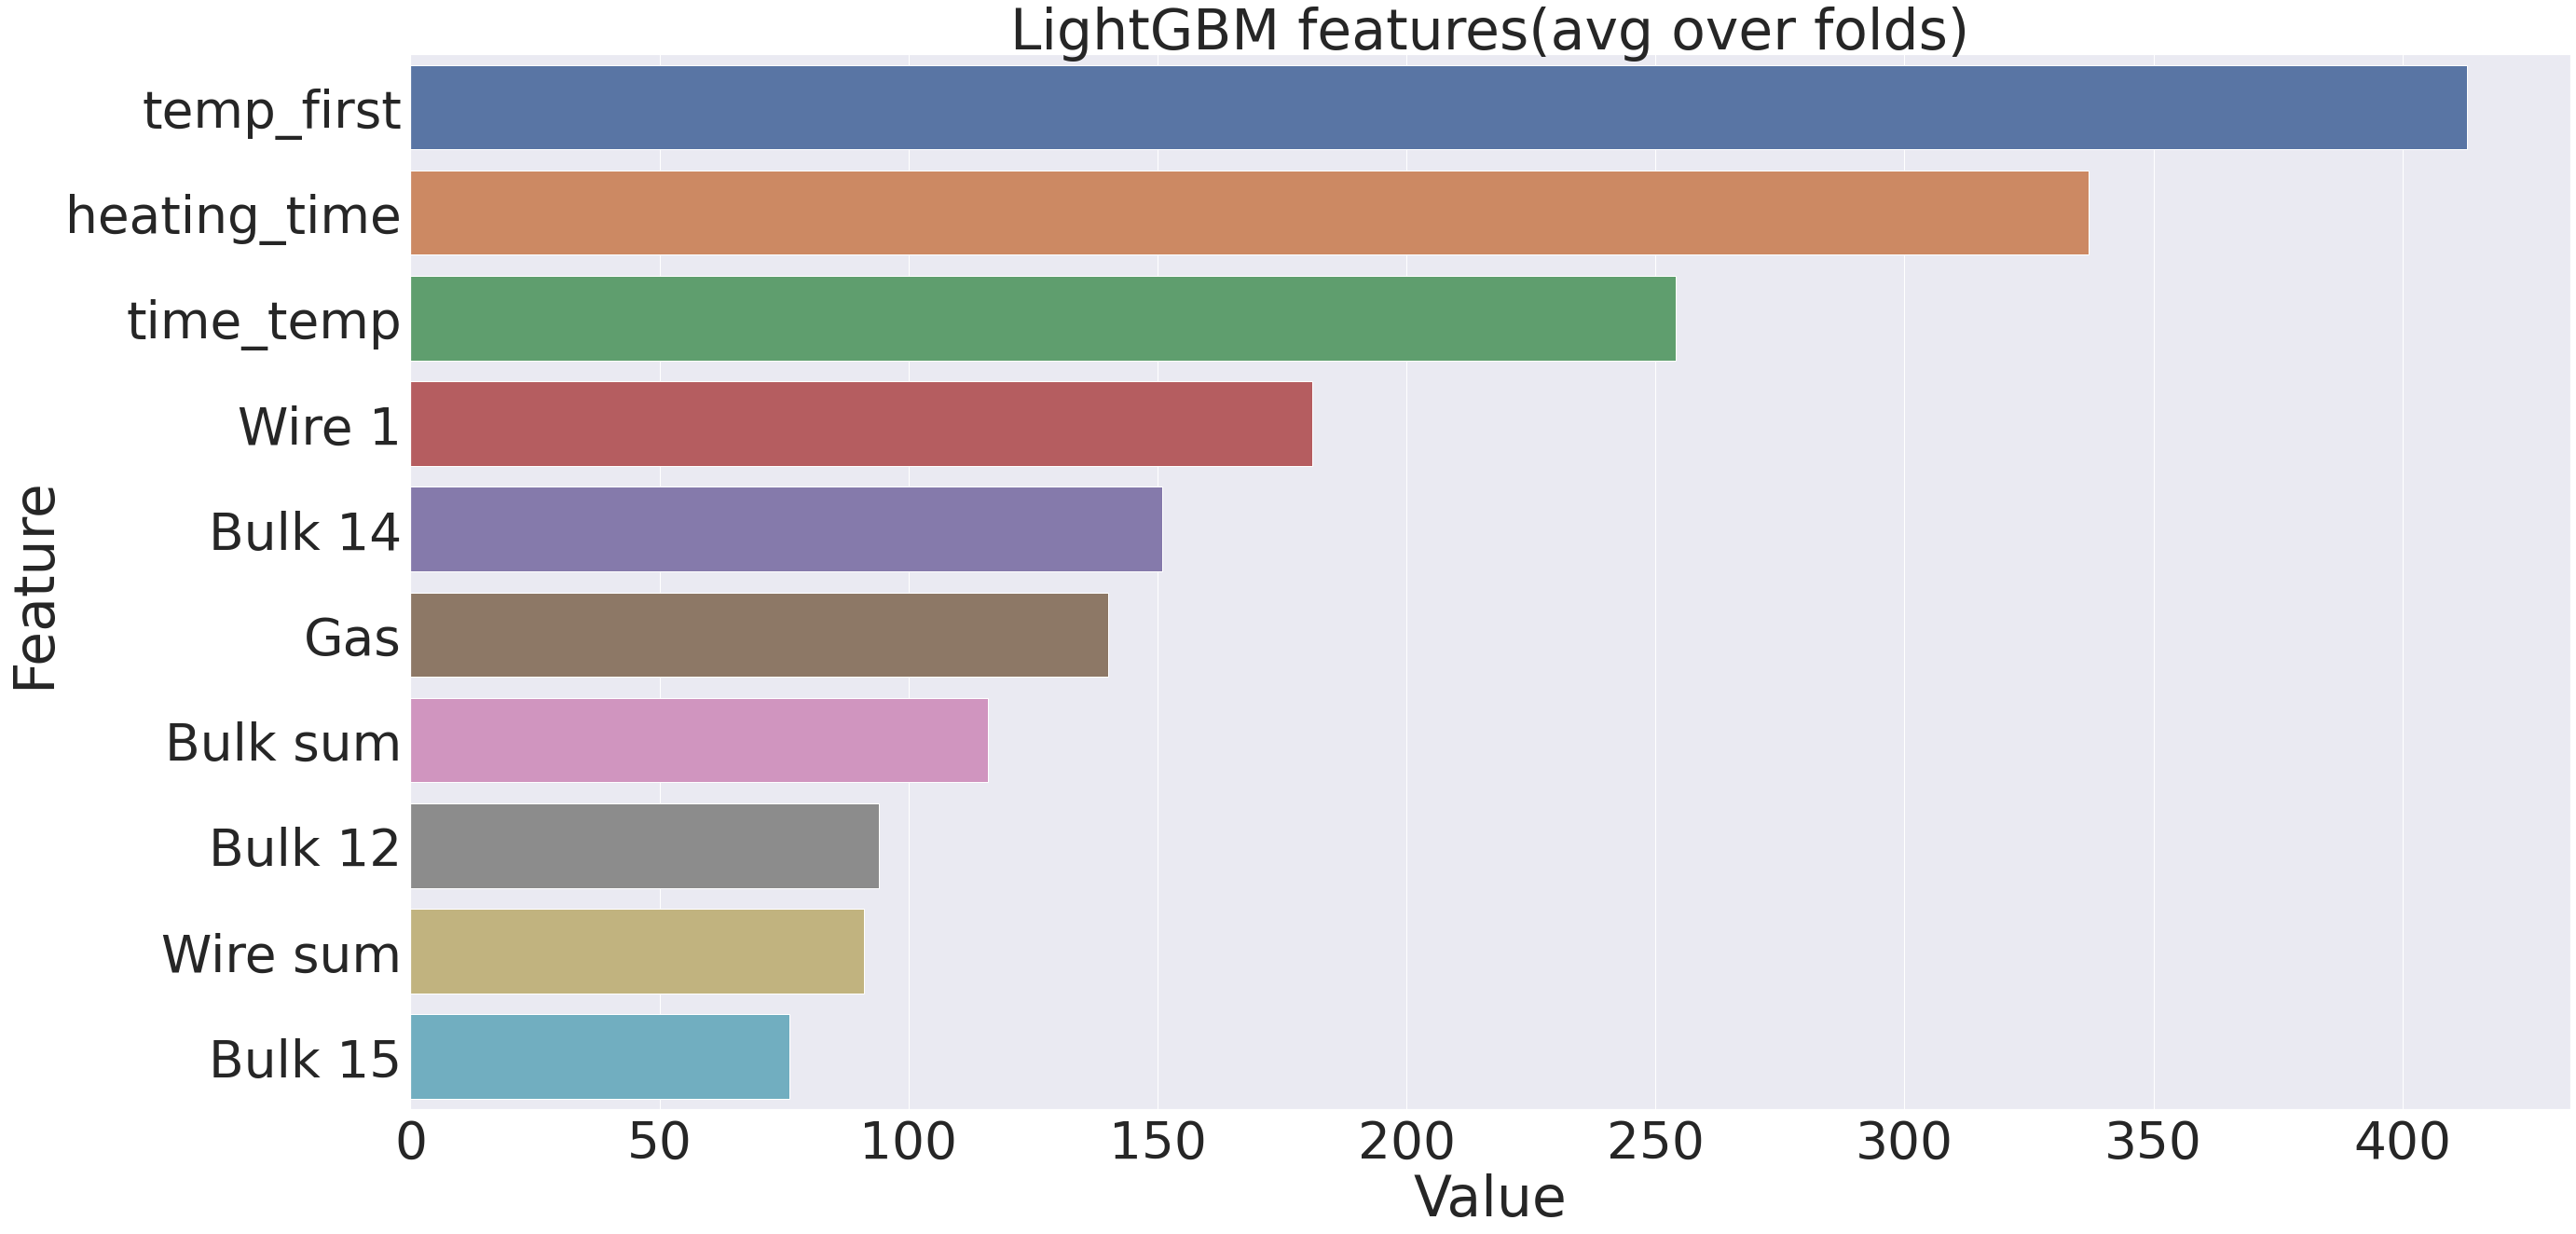

In [98]:
def plotImp(model_lgb, X , num = 20, fig_size = (12, 8)):
    feature_imp = pd.DataFrame({'Value':model_lgb.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM features(avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(model_lgb, pd.DataFrame(features_test), num = 10, fig_size = (40, 20))



Из полученного графика видно, что на финальную температуру в большей степени влияют следующие признаки(данные по сгибам):

    temp_first
    heating_time
    time_temp
    Wire 1
   

# ВЫВОД общий

 Данные металлургического комбината "Так закаляем сталь" представлены в виде датасетов из 7 таблиц с данными об объеме и времени проволочных материалов, данные об объёме и времени подачи сыпучих материалов, об электродах, о продувке сплава газом, об результатах измерения температуры. 
 
 В ходе исследовательского анализа данных была изучена первоначальная информация о датасетах:
 информации о столбцах;
 
 размерах датасета;
 
 количестве пропусков и дубликатов;
 
 небольшом исследовательском анализе данных с построением графиков до обработки данных.
 
 В результате исследовательского анализа данных наибольшее количество пропусков в данных об объёме и времени подачи сыпучих и проволочных материалов. В данных об электродах и о продувке сплава газом пропуски отсутсвуют. Дубликаты в датасетах отсутствуют. 

В результате предобработки данных были обработаны пропущенные значения в объёме сыпучих и проволочных материалов, созданы дополнительные столбцы( полная мощность, время нагрева, время измерения начальной о кончательной температуры партии и тд.), агрегированы некоторые столбцы датасетов по партиям, удаление аномальных значений мощности и температуры, изменение названия столбцов на английский язык, чтобы в окончательном(единой) датасете данные были приведены к единому виду.

В результате все датасеты были объединены в одну таблицу функцией merge c помощью INNER. В результате получилась единая таблица, в которой 19 столбцов, 2325 строк. При создании матрицы корреляций с помощью тепловой карты можно увидеть сильную корреляцию ряда признаков более 0.9. Целевым признаком является последняя измеренная температура. Она коррелирует с первой измеренной температурой, с временем нагрева 0.29, с объемом проволочного материала Wire 1(0.32). Также был скопирован датасет для удаления признаков мультиколлинеарности для обучения линейных моделей и масштабирование признаков. 

Для обучения моделей машинного обучения будет использована метрика MAE в качестве основной, и метрика R2 в качестве дополнительной.

В результате обучения моделей были использованы следующие модели: Линейная регрессия, LGBM Regressor, CatBost Regressor, XGB Regressor. Константная модель показала результат 7.99 на метрики MAE, при этом значение дополнительной метрики R2 является отрицательным. Модель может быть абсолютно бесполезна для прогнозирования и не иметь никакой предсказательной способности.

 Самый лучший результат показала модель LGBM Regressor на метрики MAE 5.95. с гиперпараметрами 'boosting_type': 'gbdt', 'force_col_wise': True, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 100, 'random_state': 22052023, 'verbose': -1, что является лучшим показателем, чем на константной модели на 25.5 %, а также показала хороший результат при использовании дополнительной метрики R2 0.47, немного ниже, чем при использовании модели Линейной регресии.

На тестировании модель LGBM Regressor показала результат MAE 6.1,R2 0.46. Из полученного графика видно, что на финальную температуру в большей степени влияют: temp_first, heating_time, time_temp


# ОТЧЁТ

● Сравнение решения и плана

В проекте по заказу металлургического комбината (ООО «Так закаляем сталь») мною был разработан план работы. В своем решении проекта над задачей заказчика о построении модели по предсказанию температуры стали я руководствовалась планом работы и рекомендациями тимлида. 
В своем решении по рекомендации тимлида мной была добавлена, дополнительна метрика R2 (количество вариаций зависимой переменной)


● Указать почему какие-то шаги не были выполнены, или написать что все шаги были выполнены
Все шаги были выполнены в соответствии с планом работы и рекомендациям тимлида.



Описание трудностей проекта и того, как они были решены.

Трудности проекта:

1) Объединение таблиц;

Решение с помощью функции Merge (Inner по ключу)

2) Добавление дополнительной метрики R2 в модели МО
(Решение: 
 
определение скореров модели,

определение модели; 

добавление сетки  гиперпараметров;

обучение модели;

определение лучших параметров;

получение результатов перекрестной проверки кросс-валидации

получение позиции лучшей модели в сетке параметров при помощи np.where для поиска индекса лучшей модели; 

вывод результатов
 




● Описание ключевых шагов решения 

1) Написание плана работы, которым я буду руководствоваться в решении над задачей заказчика (описание цели, пояснение технологического процесса, обозначение основных этапов работы с полным их описанием.
полным их описанием.

2) Исследовательский анализ данных

Загрузка данных, описание таблиц с количеством пропусков и дубликатов, размером таблиц, графическое изображение распределения признаков в виде графиков.


3) Предобработка данных 

замена пропусков, удаление аномальных значений в данных, объединение таблиц, проведение небольшого исследовательского анализа данных после обработки

4) Обучение моделей МО 

Разделение на выборки, масштабирование и удаление признаков с высокой корреляцией для линейных моделей, обучение моделей Констатной модели с медианой, линейной регрессии, LGBM, Catbost, XGB, выбор лучшей модели LGBM Regressor на МАЕ показала результат 5.95,дополнительной метрики R2 0.47

5)Тестирование модели.

тестирование лучшей модели LGBM Regressor.

6)Анализ важности признаков




● Перечислите Все признаки, которые использованы для обучения и то, как проводилась предобработка 

В результате предобработки данных были заменены на 0 все пропущенные значения в объёме сыпучих и проволочных материалов, созданы дополнительные столбцы( полная мощность, время нагрева, время измерения начальной о кончательной температуры партии и тд.), агрегированы некоторые столбцы датасетов по партиям, удаление аномальных значений мощности и температуры, изменение названия столбцов на английский язык, чтобы в окончательном(единой) датасете данные были приведены к единому виду.

В результате все датасеты были объединены в одну таблицу функцией merge c помощью INNER. В результате получилась единая таблица, в которой 19 столбцов, 2325 строк. При создании матрицы корреляций с помощью тепловой карты можно увидеть сильную корреляцию ряда признаков более 0.9. 

В результате целевым признаком является финальная температура last_temp

признаки, используемые при обучении моделей :
temp_first, time_temp, heating_time, full_power, Bulk 3, Bulk 4, Bulk 6, Bulk 13, Bulk 14, Bulk 15,	Bulk sum, Gas, Wire 1, Wire 2, Wire sum.

● Полное описани модели(с параметром random  при наличии)
Наилучший результат метрики МАE показала модель LGBM Regressor при лучших гиперпараметрах 

'boosting_type': 'gbdt',

'force_col_wise': True,

'learning_rate': 0.05, 

'max_depth': 5,

'n_estimators': 150,

'num_leaves': 100, 

'random_state': 22052023, 

'verbose': -1

Время обучения модели 127 сек., время предсказания 0.31 сек.

Метрики МАЕ 5.95

Дополнительная R2 0.47









● Указание итоговой метрики на тесте
Мной была протестирована модель LGBM  Regressor
MAE на тестовой выборке: 6.10
R2 на тестовой выборке: 0.46
Время  165 cекунд